## How robust is the drop in correlations?

We would like to know if the drop in correlations is robust to different realizations. To do this, we take the middle bin exposed to the laser (where it is strongest) in the first and last blocks, and build a confidence interval for each. This will tell us if the results are significant or not.

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import pandas as pd
from scipy.ndimage import gaussian_filter
import matplotlib as mpl
from matplotlib import cm, colorbar 
from mpl_toolkits.mplot3d import Axes3D

In [869]:
Num_trials = 40 # One early, one late
Num_bins = 24
file_names = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_10_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_20_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_30_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_40_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_60_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1.mat']
file_names1_N5000_jei_500 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_N5000_jei-500.mat']
file_names2 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_2.mat']
file_names15 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1.5.mat']
Num_realizations = len(file_names2)
mR_laserPairs_Diff_early = np.zeros((Num_realizations,Num_bins))
mR_laserPairs_Diff_middle = np.zeros((Num_realizations,Num_bins))
mR_laserPairs_Diff_late = np.zeros((Num_realizations,Num_bins))
TotalJei = np.zeros((Num_realizations,16800))
realz=0
for file in file_names15:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for bin in range(Num_bins):
        mR_laserPairs_Diff_early[realz,bin] = mat_contents['mR_laserPairs_Laser'][0,bin] - np.mean(mat_contents['mR_laserPairs_Control'][:,bin])
        mR_laserPairs_Diff_middle[realz,bin] = mat_contents['mR_laserPairs_Laser'][10,bin] - np.mean(mat_contents['mR_laserPairs_Control'][:,bin])
        mR_laserPairs_Diff_late[realz,bin] = mat_contents['mR_laserPairs_Laser'][39,bin] - np.mean(mat_contents['mR_laserPairs_Control'][:,bin])
    TotalJei[realz,:] = -mat_contents['TotalJei'][0][::100]
    realz+=1   

mR_laserPairs_Diff_early = pd.DataFrame(mR_laserPairs_Diff_early)
mR_laserPairs_Diff_late = pd.DataFrame(mR_laserPairs_Diff_late)
Number_of_points_corr = float(mat_contents['Number_of_points_corr'][0][0])
sliding_window = float(mat_contents['sliding_window'][0][0])
winsize = mat_contents['winsize'][0][0]
laserOnSet = mat_contents['laserOnSet'][0][0]/1000 - winsize/1000
time_axis = np.arange(0, Number_of_points_corr * sliding_window, sliding_window)/1000 - laserOnSet


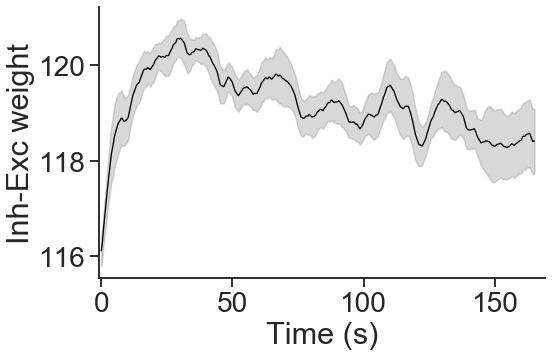

In [870]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# mean_Jei = np.mean(TotalJei,axis=0)
# stderr_Jei = np.std(TotalJei,axis=0)/np.sqrt(Num_realizations)

mov_avg = 300

Jei=np.zeros((Num_realizations, 16800-mov_avg))

for realz in range(Num_realizations):
    for i in range(16800-mov_avg):
        Jei[realz,i] = np.mean(TotalJei[realz,i:i+mov_avg])
    
mean = np.mean(Jei,axis=0)
std = np.std(Jei,axis=0)/np.sqrt(Num_realizations)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean,color = 'black')

# plt.plot(np.arange(0,16800,1), TotalJei[4,:])
# plt.plot(np.arange(0,16800,1), TotalJei[1,:])
# plt.plot(np.arange(0,16800,1), TotalJei[2,:])
# plt.plot(np.arange(0,16800,1), TotalJei[3,:])

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean - std, 
                 mean + std,
                 color='gray', alpha=0.3)
sns.despine()

plt.xlim((-1,169))
# plt.yticks((85,90,95))

plt.xlabel('Time (s)')
plt.ylabel('Inh-Exc weight')

# fig.savefig("./PlotsForPaperWithAriana/weights_awake.pdf", bbox_inches="tight")

plt.show()

## Plot of average change in noise correlations with confidence intervals

No handles with labels found to put in legend.


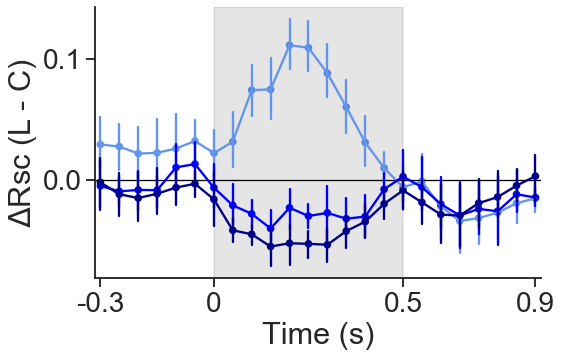

In [872]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# ax.axvspan(laserOnSet-0.3, laserOnSet-0.3+0.5, alpha=0.1, color='black')
ax.axvspan(6, 16, alpha=0.1, color='black')


plt.axhline(y=0, color='black')
sns.pointplot( kind="point", data=mR_laserPairs_Diff_early,ci=95, color='cornflowerblue', label='Early')
sns.pointplot( kind="point", data=mR_laserPairs_Diff_middle,ci=95, color='blue', label='Middle')
sns.pointplot( kind="point", data=mR_laserPairs_Diff_late, ci=95, color='darkblue', label='Late')

plt.xlabel('Time (s)')
plt.ylabel(r'$\Delta$Rsc (L - C)')

plt.xlim((-0.3,23.3))

ax.set_xticklabels([-0.3,0,0.5,0.9])
plt.xticks((0,6,16,23))
# plt.ylim((-0.11,0.31))
# plt.yticks((-0.1,0,0.1,0.2,0.3))


leg = plt.legend(loc='upper right',fontsize=15,frameon='none')
leg.get_frame().set_linewidth(0.0)

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/ConfInter_awake.pdf", bbox_inches="tight")

plt.show()

In [29]:
# Look at first block. Here the difference should always be positive.
sample_mean = np.zeros((Num_bins,1))
low_bound_earlytrial = np.zeros((Num_bins,1))
upper_bound_earlytrial = np.zeros((Num_bins,1))
n = Num_realizations
dof = n-1 # Degrees of freedom.
alpha = 0.05
t_stat = 2.447 # determined by alpha and dof.

for bin in range(Num_bins):
    sample_mean[bin,0] = np.mean(mR_laserPairs_Diff[:,bin,0])
    sample_std = np.std(mR_laserPairs_Diff[:,bin,0])
    low_bound_earlytrial[bin,0] = sample_mean[bin,0] - t_stat * sample_std / np.sqrt(n)
    upper_bound_earlytrial[bin,0] = sample_mean[bin,0] + t_stat * sample_std / np.sqrt(n)

# print('C.I. is (' ,low_bound , ',' , upper_bound , ')')

In [25]:
# Look at last block. Here the difference should always be negative.
sample_mean = np.mean(mR_laserPairs_Diff[:,1])
sample_std = np.std(mR_laserPairs_Diff[:,1])
n = Num_realizations
dof = n-1 # Degrees of freedom.
alpha = 0.05
t_stat = 2.447 # determined by alpha and dof.

low_bound = sample_mean - t_stat * sample_std / np.sqrt(n)
upper_bound = sample_mean + t_stat * sample_std / np.sqrt(n)

print('C.I. is (' ,low_bound , ',' , upper_bound , ')')

CI is ( -0.07196480042849761 , -0.010117698828567029 )


# Rest state

In [294]:
Num_trials = 40 # One early, one late
Num_bins = 24
# file_names = ['./ArianaVariables_ee_ei_ie_ii_seed_20.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_30.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_40.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_50.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_60.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_80.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_90.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_100.mat']
# This files have Jm=0.4*[25 -300; 112.5 -250]. Will test others.

# Next files will test Jm=scale*[10, -100; 112.5, -250] with different seeds.
file_names = ['./ArianaVariables_ee_ei_ie_ii_seed_10_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_20_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_30_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_40_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_50_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_60_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_70_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_80_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_90_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_100_scale_0.4.mat']
# file_names = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_0.6.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.6.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_2_scale_0.6.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_3_scale_0.6.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_4_scale_0.6.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_5_scale_0.6.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_6_scale_0.6.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_7_scale_0.6.mat',
#               './ArianaVariables_ee_ei_ie_ii_seed_8_scale_0.6.mat']

Num_realizations = len(file_names)
mR_laserPairs_Diff_early = np.zeros((Num_realizations,Num_bins))
mR_laserPairs_Diff_middle = np.zeros((Num_realizations,Num_bins))
mR_laserPairs_Diff_late = np.zeros((Num_realizations,Num_bins))
TotalJei = np.zeros((Num_realizations,16800))
realz=0
for file in file_names:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for bin in range(Num_bins):
        mR_laserPairs_Diff_early[realz,bin] = mat_contents['mR_laserPairs_Laser'][0,bin] - np.mean(mat_contents['mR_laserPairs_Control'][:,bin])
        mR_laserPairs_Diff_middle[realz,bin] = mat_contents['mR_laserPairs_Laser'][10,bin] - np.mean(mat_contents['mR_laserPairs_Control'][:,bin])
        mR_laserPairs_Diff_late[realz,bin] = mat_contents['mR_laserPairs_Laser'][39,bin] - np.mean(mat_contents['mR_laserPairs_Control'][:,bin])
    TotalJei[realz,:] = -mat_contents['TotalJei'][0][::100]
    realz+=1   

mR_laserPairs_Diff_early = pd.DataFrame(mR_laserPairs_Diff_early)
mR_laserPairs_Diff_late = pd.DataFrame(mR_laserPairs_Diff_late)
Number_of_points_corr = float(mat_contents['Number_of_points_corr'][0][0])
sliding_window = float(mat_contents['sliding_window'][0][0])
winsize = mat_contents['winsize'][0][0]
laserOnSet = mat_contents['laserOnSet'][0][0]/1000 - winsize/1000
time_axis = np.arange(0, Number_of_points_corr * sliding_window, sliding_window)/1000 - laserOnSet


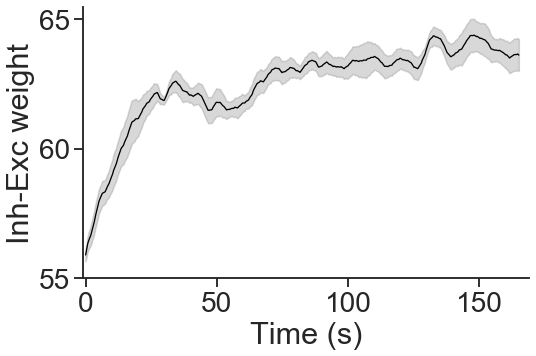

In [296]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# mean_Jei = np.mean(TotalJei,axis=0)
# stderr_Jei = np.std(TotalJei,axis=0)/np.sqrt(Num_realizations)

mov_avg = 300

Jei=np.zeros((Num_realizations, 16800-mov_avg))

for realz in range(Num_realizations):
    for i in range(16800-mov_avg):
        Jei[realz,i] = np.mean(TotalJei[realz,i:i+mov_avg])
    
mean = np.mean(Jei,axis=0)
std = np.std(Jei,axis=0)/np.sqrt(Num_realizations)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean,color = 'black')

# plt.plot(np.arange(0,16800,1), TotalJei[4,:])
# plt.plot(np.arange(0,16800,1), TotalJei[1,:])
# plt.plot(np.arange(0,16800,1), TotalJei[2,:])
# plt.plot(np.arange(0,16800,1), TotalJei[3,:])

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean - std, 
                 mean + std,
                 color='gray', alpha=0.3)
sns.despine()

plt.xlim((-1,169))
plt.yticks((55,60,65))

plt.xlabel('Time (s)')
plt.ylabel('Inh-Exc weight')

# fig.savefig("./PlotsForPaperWithAriana/weights_rest.pdf", bbox_inches="tight")

plt.show()

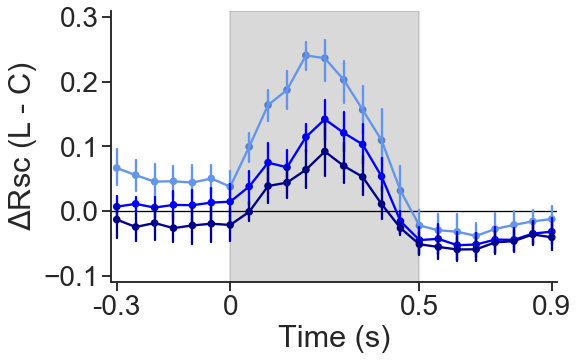

In [297]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# ax.axvspan(laserOnSet-0.3, laserOnSet-0.3+0.5, alpha=0.1, color='black')
ax.axvspan(6, 16, alpha=0.15, color='black')


plt.axhline(y=0, color='black')
sns.pointplot( kind="point", data=mR_laserPairs_Diff_early,ci=95, color='cornflowerblue', label='Early')
sns.pointplot( kind="point", data=mR_laserPairs_Diff_middle,ci=95, color='blue', label='Middle')
sns.pointplot( kind="point", data=mR_laserPairs_Diff_late, ci=95, color='darkblue', label='Late')

plt.xlabel('Time (s)')
plt.ylabel(r'$\Delta$Rsc (L - C)')

ax.set_xticklabels([-0.3,0,0.5,0.9])
plt.xticks((0,6,16,23))
plt.xlim((-0.3,23.3))
plt.ylim((-0.11,0.31))
plt.yticks((-0.1,0,0.1,0.2,0.3))

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/ConfInter_rest.pdf", bbox_inches="tight")

plt.show()

In [195]:
Num_trials = 40 # One early, one late
Num_bins = 24

# This files are for a network with initial J=1*[10,-250; 112.5, -250].
file_names1_jei500 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_10_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_20_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_30_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_40_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_60_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1.mat']


# Next files will test Jm=scale*[10, -100; 112.5, -250] with different seeds.
file_names02 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_0.2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_0.2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_0.2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_0.2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_0.2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_0.2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_0.2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_0.2.mat']
file_names04 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_0.4.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_9_scale_0.4.mat']
file_names04_nostdp = ['./ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.4_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_0.4_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_0.4_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_0.4_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_0.4_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_0.4_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_0.4_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_0.4_nostdp.mat']
file_names05 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_0.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_0.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_0.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_0.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_0.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_0.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_0.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_0.5.mat',
                './ArianaVariables_ee_ei_ie_ii_seed_9_scale_0.5.mat']
file_names06 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_0.6.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.6.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_0.6.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_0.6.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_0.6.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_0.6.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_0.6.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_0.6.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_0.6.mat']
file_names08 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_0.8.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.8.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_0.8.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_0.8.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_0.8.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_0.8.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_0.8.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_0.8.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_0.8.mat']
file_names1 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_9_scale_1.mat']
file_names1_freq_10 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_freq_10.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_10.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_freq_10.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_freq_10.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_freq_10.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_freq_10.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_freq_10.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_freq_10.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_freq_10.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_9_scale_1_freq_10.mat']
file_names1_freq_20 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_freq_20.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_20.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_freq_20.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_freq_20.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_freq_20.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_freq_20.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_freq_20.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_freq_20.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_freq_20.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_9_scale_1_freq_20.mat']
file_names1_freq_100 = [#'./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_freq_100.mat',
              #'./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_100.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_freq_100.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_freq_100.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_freq_100.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_freq_100.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_freq_100.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_freq_100.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_freq_100.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_9_scale_1_freq_100.mat']
file_names15 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1.5.mat']
file_names2 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_2.mat']
file_names1_eeSTDP = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_eeSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_eeSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_eeSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_eeSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_eeSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_eeSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_eeSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_eeSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_eeSTDP.mat']
file_names1_ieSTDP = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_ieSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_ieSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_ieSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_ieSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_ieSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_ieSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_ieSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_ieSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_ieSTDP.mat']
file_names1_ei_iiSTDP = [#'./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_ei_iiSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_ei_iiSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_ei_iiSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_ei_iiSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_ei_iiSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_ei_iiSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_ei_iiSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_ei_iiSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_ei_iiSTDP.mat']
file_names1_nostdp = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_nostdp.mat']
file_names13_nostdp = [#'./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1.3_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.3_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.3_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.3_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1.3_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1.3_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1.3_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1.3_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1.3_nostdp.mat']
file_names16_nostdp = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1.6_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.6_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.6_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.6_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1.6_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1.6_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1.6_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1.6_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1.6_nostdp.mat']
file_names25_nostdp = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_2.5_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_2.5_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_2.5_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_2.5_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_2.5_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_2.5_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_2.5_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_2.5_nostdp.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_2.5_nostdp.mat']
file_names1_allSTDP = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_allSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_allSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_allSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_allSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_allSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_allSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_allSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_allSTDP.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_allSTDP.mat']
file_names1_N5000 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_N5000.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_N5000.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_N5000.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_N5000.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_N5000.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_N5000.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_N5000.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_N5000.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_N5000.mat']
file_names1_N5000_jei_200 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_N5000_jei-200.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_N5000_jei-200.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_N5000_jei-200.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_N5000_jei-200.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_N5000_jei-200.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_N5000_jei-200.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_N5000_jei-200.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_N5000_jei-200.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_N5000_jei-200.mat']
file_names1_N5000_jei_300 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_N5000_jei-300.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_N5000_jei-300.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_N5000_jei-300.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_N5000_jei-300.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_N5000_jei-300.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_N5000_jei-300.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_N5000_jei-300.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_N5000_jei-300.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_N5000_jei-300.mat']
file_names1_N5000_jei_500 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_N5000_jei-500.mat']

# Num_realizations = len(file_names)
mR_laserPairs_Diff_02 = np.zeros((len(file_names02),Num_trials))
mR_laserPairs_Diff_04 = np.zeros((len(file_names04),Num_trials))
mR_laserPairs_Diff_04_nostdp = np.zeros((len(file_names04_nostdp),Num_trials))
mR_laserPairs_Diff_05 = np.zeros((len(file_names05),Num_trials))
mR_laserPairs_Diff_06 = np.zeros((len(file_names06),Num_trials))
mR_laserPairs_Diff_08 = np.zeros((len(file_names08),Num_trials))
mR_laserPairs_Diff_1 = np.zeros((len(file_names1),Num_trials))
mR_laserPairs_Diff_1_freq_10 = np.zeros((len(file_names1_freq_10),Num_trials))
mR_laserPairs_Diff_1_freq_20 = np.zeros((len(file_names1_freq_20),Num_trials))
mR_laserPairs_Diff_1_freq_100 = np.zeros((len(file_names1_freq_100),Num_trials))
mR_laserPairs_Diff_15 = np.zeros((len(file_names15),Num_trials))
mR_laserPairs_Diff_2 = np.zeros((len(file_names2),Num_trials))
mR_laserPairs_Diff_1_eeSTDP = np.zeros((len(file_names1_eeSTDP),Num_trials))
mR_laserPairs_Diff_1_ieSTDP = np.zeros((len(file_names1_ieSTDP),Num_trials))
mR_laserPairs_Diff_1_ei_iiSTDP = np.zeros((len(file_names1_ei_iiSTDP),Num_trials))
mR_laserPairs_Diff_1_nostdp = np.zeros((len(file_names1_nostdp),Num_trials))
mR_laserPairs_Diff_13_nostdp = np.zeros((len(file_names13_nostdp),Num_trials))
mR_laserPairs_Diff_16_nostdp = np.zeros((len(file_names16_nostdp),Num_trials))
mR_laserPairs_Diff_25_nostdp = np.zeros((len(file_names25_nostdp),Num_trials))
mR_laserPairs_Diff_1_allSTDP = np.zeros((len(file_names1_allSTDP),Num_trials))
mR_laserPairs_Diff_1_N5000 = np.zeros((len(file_names1_N5000),Num_trials))
mR_laserPairs_Diff_1_N5000_jei_200 = np.zeros((len(file_names1_N5000_jei_200),Num_trials))
mR_laserPairs_Diff_1_N5000_jei_300 = np.zeros((len(file_names1_N5000_jei_300),Num_trials))
mR_laserPairs_Diff_1_N5000_jei_500 = np.zeros((len(file_names1_N5000_jei_500),Num_trials))


TotalJei_02 = np.zeros((len(file_names02),168000))
TotalJei_04 = np.zeros((len(file_names04),16800))
TotalJei_05 = np.zeros((len(file_names05),16800))
TotalJei_06 = np.zeros((len(file_names06),168000))
TotalJei_08 = np.zeros((len(file_names08),168000))
TotalJei_1 = np.zeros((len(file_names1),16800))
TotalJei_1_freq_10 = np.zeros((len(file_names1_freq_10),16800))
TotalJei_1_freq_20 = np.zeros((len(file_names1_freq_20),16800))
TotalJei_1_freq_100 = np.zeros((len(file_names1_freq_100),16800))
TotalJei_15 = np.zeros((len(file_names15),168000))
TotalJei_2 = np.zeros((len(file_names2),168000))
TotalJee_1_eeSTDP = np.zeros((len(file_names1_eeSTDP),16800))
TotalJie_1_ieSTDP = np.zeros((len(file_names1_ieSTDP),16800))
TotalJei_1_ei_iiSTDP = np.zeros((len(file_names1_ei_iiSTDP),16800))
TotalJii_1_ei_iiSTDP = np.zeros((len(file_names1_ei_iiSTDP),16800))
TotalJei_1_N5000 = np.zeros((len(file_names1_N5000),168000))
TotalJei_1_N5000_jei_200 = np.zeros((len(file_names1_N5000_jei_200),168000))
TotalJei_1_N5000_jei_300 = np.zeros((len(file_names1_N5000_jei_300),168000))
TotalJei_1_N5000_jei_500 = np.zeros((len(file_names1_N5000_jei_500),168000))

TotalJee_1_allSTDP = np.zeros((len(file_names1_allSTDP),168000))
TotalJei_1_allSTDP = np.zeros((len(file_names1_allSTDP),168000))
TotalJie_1_allSTDP = np.zeros((len(file_names1_allSTDP),168000))
TotalJii_1_allSTDP = np.zeros((len(file_names1_allSTDP),168000))


realz=0
for file in file_names02:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_02[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_02[realz,:] = -mat_contents['TotalJei'][0][::10]
    realz+=1  

realz=0
for file in file_names04:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_04[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_04[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1   

realz=0
for file in file_names04_nostdp:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_04_nostdp[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    realz+=1   

realz=0
for file in file_names05:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_05[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_05[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1
    
realz=0
for file in file_names06:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_06[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_06[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1   

realz=0
for file in file_names08:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_08[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_08[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1   

realz=0   
for file in file_names1:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_1[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1   
    
realz=0   
for file in file_names1_freq_10:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_freq_10[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_1_freq_10[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1   
    
realz=0   
for file in file_names1_freq_20:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_freq_20[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_1_freq_20[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1
    
realz=0   
for file in file_names1_freq_100:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_freq_100[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_1_freq_100[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1   

realz=0   
for file in file_names15:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_15[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_15[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1
    
realz=0   
for file in file_names2:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_2[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_2[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1   
    
realz=0   
for file in file_names1_N5000:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_N5000[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_1_N5000[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1
    
realz=0   
for file in file_names1_N5000_jei_200:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_N5000_jei_200[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_1_N5000_jei_200[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1
    
realz=0   
for file in file_names1_N5000_jei_300:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_N5000_jei_300[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_1_N5000_jei_300[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1

realz=0   
for file in file_names1_N5000_jei_500:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_N5000_jei_500[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_1_N5000_jei_500[realz,:] = -mat_contents['TotalJei'][0][::10]    
    realz+=1

realz=0   
for file in file_names1_eeSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_eeSTDP[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJee_1_eeSTDP[realz,:] = mat_contents['TotalJee'][0][::10] 
    realz+=1

realz=0   
for file in file_names1_ieSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_ieSTDP[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJie_1_ieSTDP[realz,:] = mat_contents['TotalJie'][0][::10] 
    realz+=1
    
realz=0   
for file in file_names1_ei_iiSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_ei_iiSTDP[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    TotalJei_1_ei_iiSTDP[realz,:] = -mat_contents['TotalJei'][0][::10]
    TotalJii_1_ei_iiSTDP[realz,:] = -mat_contents['TotalJii'][0][::10]
    realz+=1
    
realz=0   
for file in file_names1_nostdp:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_nostdp[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    realz+=1
    
realz=0   
for file in file_names13_nostdp:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_13_nostdp[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    realz+=1
    
realz=0   
for file in file_names16_nostdp:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_16_nostdp[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    realz+=1
    
realz=0   
for file in file_names25_nostdp:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_25_nostdp[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    realz+=1

realz=0   
for file in file_names1_allSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for trial in range(Num_trials):
        mR_laserPairs_Diff_1_allSTDP[realz,trial] = mat_contents['mR_laserPairs_Laser'][trial,11] - np.mean(mat_contents['mR_laserPairs_Control'][:,11])
    
    TotalJee_1_allSTDP[realz,:] = mat_contents['TotalJee'][0][::10]     
    TotalJie_1_allSTDP[realz,:] = mat_contents['TotalJie'][0][::10] 
    TotalJei_1_allSTDP[realz,:] = -mat_contents['TotalJei'][0][::10]
    TotalJii_1_allSTDP[realz,:] = -mat_contents['TotalJii'][0][::10]
    realz+=1
    
mR_laserPairs_Diff_02 = pd.DataFrame(mR_laserPairs_Diff_02)
mR_laserPairs_Diff_04 = pd.DataFrame(mR_laserPairs_Diff_04)
mR_laserPairs_Diff_04_nostdp = pd.DataFrame(mR_laserPairs_Diff_04_nostdp)
mR_laserPairs_Diff_05 = pd.DataFrame(mR_laserPairs_Diff_05)
mR_laserPairs_Diff_06 = pd.DataFrame(mR_laserPairs_Diff_06)
mR_laserPairs_Diff_08 = pd.DataFrame(mR_laserPairs_Diff_08)
mR_laserPairs_Diff_1 = pd.DataFrame(mR_laserPairs_Diff_1)
mR_laserPairs_Diff_1_freq_10 = pd.DataFrame(mR_laserPairs_Diff_1_freq_10)
mR_laserPairs_Diff_1_freq_20 = pd.DataFrame(mR_laserPairs_Diff_1_freq_20)
mR_laserPairs_Diff_1_freq_100 = pd.DataFrame(mR_laserPairs_Diff_1_freq_100)
mR_laserPairs_Diff_15 = pd.DataFrame(mR_laserPairs_Diff_15)
mR_laserPairs_Diff_2 = pd.DataFrame(mR_laserPairs_Diff_2)
mR_laserPairs_Diff_1_eeSTDP = pd.DataFrame(mR_laserPairs_Diff_1_eeSTDP)
mR_laserPairs_Diff_1_ieSTDP = pd.DataFrame(mR_laserPairs_Diff_1_ieSTDP)
mR_laserPairs_Diff_1_ei_iiSTDP = pd.DataFrame(mR_laserPairs_Diff_1_ei_iiSTDP)
mR_laserPairs_Diff_1_nostdp = pd.DataFrame(mR_laserPairs_Diff_1_nostdp)
mR_laserPairs_Diff_13_nostdp = pd.DataFrame(mR_laserPairs_Diff_13_nostdp)
mR_laserPairs_Diff_16_nostdp = pd.DataFrame(mR_laserPairs_Diff_16_nostdp)
mR_laserPairs_Diff_25_nostdp = pd.DataFrame(mR_laserPairs_Diff_25_nostdp)
mR_laserPairs_Diff_1_N5000 = pd.DataFrame(mR_laserPairs_Diff_1_N5000)
mR_laserPairs_Diff_1_N5000_jei_200 = pd.DataFrame(mR_laserPairs_Diff_1_N5000_jei_200)
mR_laserPairs_Diff_1_N5000_jei_300 = pd.DataFrame(mR_laserPairs_Diff_1_N5000_jei_300)
mR_laserPairs_Diff_1_N5000_jei_500 = pd.DataFrame(mR_laserPairs_Diff_1_N5000_jei_500)


Number_of_points_corr = float(mat_contents['Number_of_points_corr'][0][0])
sliding_window = float(mat_contents['sliding_window'][0][0])
winsize = mat_contents['winsize'][0][0]
laserOnSet = mat_contents['laserOnSet'][0][0]/1000 - winsize/1000
time_axis = np.arange(0, Number_of_points_corr * sliding_window, sliding_window)/1000 - laserOnSet


## Main text: Center bin of correlations for awake vs rest

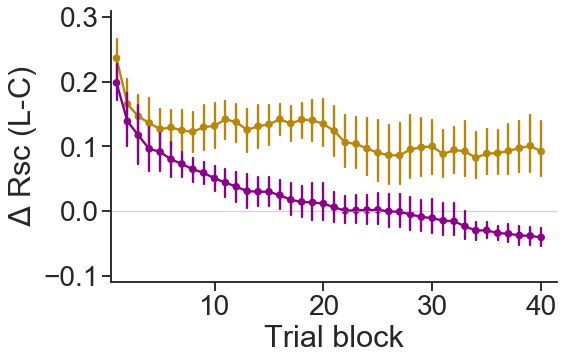

In [707]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

bin = 11

# R_02 = sns.pointplot( kind='point',data=mR_laserPairs_Diff_02, ci=95, color='green')
R_04 = sns.pointplot( kind='point',data=mR_laserPairs_Diff_04, ci=95, color='darkgoldenrod')
# R_04_nostdp = sns.pointplot( kind='point',data=mR_laserPairs_Diff_04_nostdp, ci=95, color='black')
# R_06 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_06,ci=95, color='darkgreen')
# R_08 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_08,ci=95, color='red')
R_1 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1, ci=95, color='darkmagenta')
# R_1_eeSTDP = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_eeSTDP, ci=95, color='red')
# R_1_nostdp = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_nostdp, ci=95, color='black')
# R_1_N5000 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_N5000, ci=95, color='blue')
# R_1_N5000_jei_200 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_N5000_jei_200, ci=95, color='black')
# R_1_N5000_jei_300 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_N5000_jei_300, ci=95, color='red')
# R_1_N5000_jei_500 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_N5000_jei_500, ci=95, color='green')

# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'$\Delta$ Rsc (L-C)')

# plt.title('Center time bin in laser period')
plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

plt.ylim(-0.11,0.31)

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Corr_scale_factor_blocks.pdf", bbox_inches="tight")

plt.show()


## Supplementary fig #1: Vary scaling factor for EI STDP only

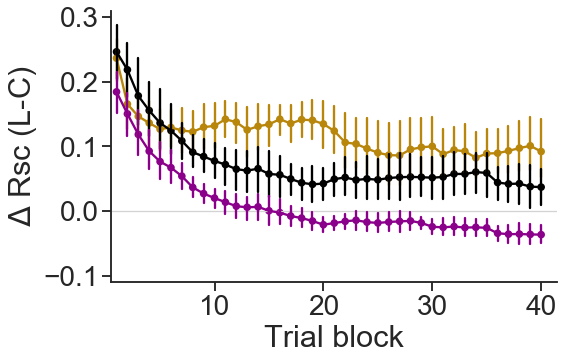

In [70]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

bin = 11

# R_02 = sns.pointplot( kind='point',data=mR_laserPairs_Diff_02, ci=95, color='green')
R_04 = sns.pointplot( kind='point',data=mR_laserPairs_Diff_04, ci=95, color='darkgoldenrod')
# R_04_nostdp = sns.pointplot( kind='point',data=mR_laserPairs_Diff_04_nostdp, ci=95, color='black')
R_05 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_05,ci=95, color='black')
# R_06 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_06,ci=95, color='blue')
# R_08 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_08,ci=95, color='red')
R_1 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1, ci=95, color='darkmagenta')
# R_15 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_15, ci=95, color='purple')
# R_2 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_2, ci=95, color='darkgreen')

# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'$\Delta$ Rsc (L-C)')

# plt.title('Center time bin in laser period')
plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

plt.ylim(-0.11,0.31)

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/Suppl_corr_scale_factor_eiSTDP.pdf", bbox_inches="tight")

plt.show()


In [18]:
# mov_avg = 100
# Jei_04=np.zeros((len(file_names04), 168000-mov_avg))

# for realz in range(len(file_names04)):
#     for i in range(168000-mov_avg):
#         Jei_04[realz,i] = np.mean(TotalJei_04[realz,i:i+mov_avg])

KeyboardInterrupt: 

In [229]:
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_0_scale_0.5.mat')



In [230]:
mat_contents['IiCurrent_stim'].shape

KeyError: 'IiCurrent_stim'

In [103]:
## Compute the weights sliding a window over time and trials for a single realization.
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_0_scale_0.4.mat')
winsize = int(mat_contents['winsize'][0,0]/1)
sliding_window = int(mat_contents['sliding_window'][0,0]/1)
TrialTime = mat_contents['TrialTime'][0,0]
LaserTrials = mat_contents['LaserTrials'][0]
ControlTrials = mat_contents['ControlTrials'][:,0]
Total_number_trials = mat_contents['Total_number_trials'][0,0]

Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))

block_slide_size = 20; # = how many trials in one block.
NBlockTrials = int(len(LaserTrials)-block_slide_size)


Jei_Control = np.zeros((NBlockTrials,Number_of_points_J))
Jei_Laser = np.zeros((NBlockTrials,Number_of_points_J))

for BlockTrial in range(NBlockTrials):
    ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
    LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
    for i in range(Total_number_trials):
        if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
            for window in range(Number_of_points_J):
                T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                T2=T1+winsize;   # Compute covariances until end of simulation
                
                Jei_Control[BlockTrial,window] = Jei_Control[BlockTrial,window] + np.mean(TotalJei_08[0,T1:T2+1])# - TotalJei_08[0,0])
        elif i+1 in LaserTrialsUsed:  # if laser trial.
            for window in range(Number_of_points_J):
                T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                T2=T1+winsize;   # Compute covariances until end of simulation
                
                Jei_Laser[BlockTrial,window] = Jei_Laser[BlockTrial,window] + np.mean(TotalJei_08[0,T1:T2+1])# - TotalJei_08[0,0])

# We summed spike counts over trials, now we divide by over how many trials we added them.
Jei_Control = Jei_Control / block_slide_size
Jei_Laser = Jei_Laser / block_slide_size

# Jei_Laser = pd.DataFrame(Jei_Laser)

In [104]:
## Compute the weights sliding a window over realizations and trials for a single time bin.

Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))

block_slide_size = 20; # = how many trials in one block.
NBlockTrials = int(len(LaserTrials)-block_slide_size)
bin=11

# Weights for f=0.4, ei STDP.
Jei_Control_blocks_04 = np.zeros((len(file_names04),Num_trials))
Jei_Laser_blocks_04 = np.zeros((len(file_names04),Num_trials))
realz=0
for file in file_names04:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jei_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jei_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Control[BlockTrial,window] = Jei_Control[BlockTrial,window] + np.mean(TotalJei_04[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Laser[BlockTrial,window] = Jei_Laser[BlockTrial,window] + np.mean(TotalJei_04[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jei_Control = Jei_Control / block_slide_size
    Jei_Laser = Jei_Laser / block_slide_size
    for trial in range(Num_trials):
        Jei_Laser_blocks_04[realz,trial] = Jei_Laser[trial,bin]
        Jei_Control_blocks_04[realz,trial] = Jei_Control[trial,bin]
    
    realz+=1
    
# Weights for f=0.5, ei STDP.
Jei_Control_blocks_05 = np.zeros((len(file_names05),Num_trials))
Jei_Laser_blocks_05 = np.zeros((len(file_names05),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
realz=0
for file in file_names05:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jei_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jei_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Control[BlockTrial,window] = Jei_Control[BlockTrial,window] + np.mean(TotalJei_05[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Laser[BlockTrial,window] = Jei_Laser[BlockTrial,window] + np.mean(TotalJei_05[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jei_Control = Jei_Control / block_slide_size
    Jei_Laser = Jei_Laser / block_slide_size
    for trial in range(Num_trials):
        Jei_Laser_blocks_05[realz,trial] = Jei_Laser[trial,bin]
        Jei_Control_blocks_05[realz,trial] = Jei_Control[trial,bin]
    
    realz+=1
    
    
# Weights for f=1, ei STDP.
Jei_Control_blocks_1 = np.zeros((len(file_names1),Num_trials))
Jei_Laser_blocks_1 = np.zeros((len(file_names1),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
realz=0
for file in file_names1:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jei_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jei_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Control[BlockTrial,window] = Jei_Control[BlockTrial,window] + np.mean(TotalJei_1[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Laser[BlockTrial,window] = Jei_Laser[BlockTrial,window] + np.mean(TotalJei_1[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jei_Control = Jei_Control / block_slide_size
    Jei_Laser = Jei_Laser / block_slide_size
    for trial in range(Num_trials):
        Jei_Laser_blocks_1[realz,trial] = Jei_Laser[trial,bin]
        Jei_Control_blocks_1[realz,trial] = Jei_Control[trial,bin]
    
    realz+=1


/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [106]:
## Compute the Inhibitory current sliding a window over realizations and trials for a single time bin.
winsize = int(mat_contents['winsize'][0,0]/1)
sliding_window = int(mat_contents['sliding_window'][0,0]/1)
TrialTime = mat_contents['TrialTime'][0,0]
LaserTrials = mat_contents['LaserTrials'][0]
ControlTrials = mat_contents['ControlTrials'][:,0]
Total_number_trials = mat_contents['Total_number_trials'][0,0]

Number_of_points_Ii = int((TrialTime/winsize-1)*(winsize/sliding_window))

block_slide_size = 20; # = how many trials in one block.
NBlockTrials = int(len(LaserTrials)-block_slide_size)
bin=11

# Weights for f=0.4, ei STDP.
Ii_Control_blocks_04 = np.zeros((len(file_names04),Num_trials))
Ii_Laser_blocks_04 = np.zeros((len(file_names04),Num_trials))
realz=0
for file in file_names04:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_04[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_04[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1
    
# Weights for f=0.5, ei STDP.
Ii_Control_blocks_05 = np.zeros((len(file_names05),Num_trials))
Ii_Laser_blocks_05 = np.zeros((len(file_names05),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/1)
sliding_window = int(mat_contents['sliding_window'][0,0]/1)
Number_of_points_Ii = int((TrialTime/winsize-1)*(winsize/sliding_window))
TrialTime = int(mat_contents['TrialTime'][0,0]/1)
realz=0
for file in file_names05:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_05[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_05[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1
    
    
# Weights for f=1, ei STDP.
Ii_Control_blocks_1 = np.zeros((len(file_names1),Num_trials))
Ii_Laser_blocks_1 = np.zeros((len(file_names1),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/1)
sliding_window = int(mat_contents['sliding_window'][0,0]/1)
Number_of_points_Ii = int((TrialTime/winsize-1)*(winsize/sliding_window))
TrialTime = int(mat_contents['TrialTime'][0,0]/1)
realz=0
for file in file_names1:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_1[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_1[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1


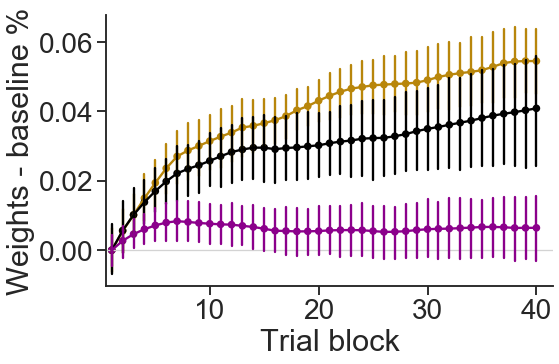

In [271]:
# Plot weight against blocks, averaged at each block for the center laser time bin.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

sns.pointplot( kind='point',data=(Jei_Laser_blocks_04-np.mean(Jei_Laser_blocks_04[:,0]))/np.mean(Jei_Laser_blocks_04[:,0]), ci=95, color='darkgoldenrod')
sns.pointplot( kind='point',data=(Jei_Laser_blocks_05-np.mean(Jei_Laser_blocks_05[:,0]))/np.mean(Jei_Laser_blocks_05[:,0]), ci=95, color='black')
sns.pointplot( kind='point',data=(Jei_Laser_blocks_1-np.mean(Jei_Laser_blocks_1[:,0]))/np.mean(Jei_Laser_blocks_1[:,0]), ci=95, color='darkmagenta')

# plt.plot(np.transpose(Jei_Laser)[bin]-np.transpose(Jei_Laser)[bin][0])


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'Weights - baseline %')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(81,84)

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/weights_all_scales_eiSTDP.pdf", bbox_inches="tight")

plt.show()

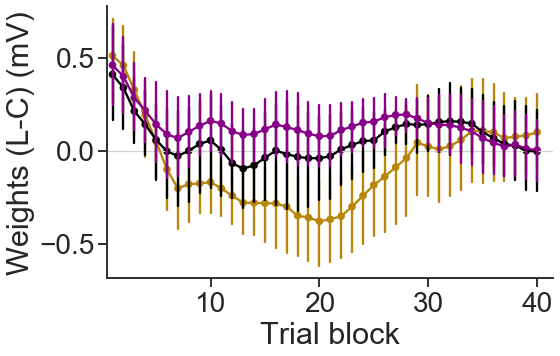

In [286]:
# Plot weight against blocks, averaged at each block for the center laser time bin.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

# sns.pointplot( kind='point',data=(Jei_Laser_blocks_04-np.mean(Jei_Control_blocks_04[:,0])), ci=95, color='darkgoldenrod')
# sns.pointplot( kind='point',data=(Jei_Laser_blocks_05-np.mean(Jei_Control_blocks_05[:,0])), ci=95, color='black')
# sns.pointplot( kind='point',data=(Jei_Laser_blocks_1-np.mean(Jei_Control_blocks_1[:,0])), ci=95, color='darkmagenta')


sns.pointplot( kind='point',data=-(Jei_Laser_blocks_04-Jei_Control_blocks_04), ci=95, color='darkgoldenrod')
sns.pointplot( kind='point',data=-(Jei_Laser_blocks_05-Jei_Control_blocks_05), ci=95, color='black')
sns.pointplot( kind='point',data=-(Jei_Laser_blocks_1-Jei_Control_blocks_1), ci=95, color='darkmagenta')



# plt.plot(np.transpose(Jei_Laser)[bin]-np.transpose(Jei_Laser)[bin][0])


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'Weights (L-C) (mV)')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(81,84)

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/weights_all_scales_eiSTDP_laserminuscontrol.pdf", bbox_inches="tight")

plt.show()

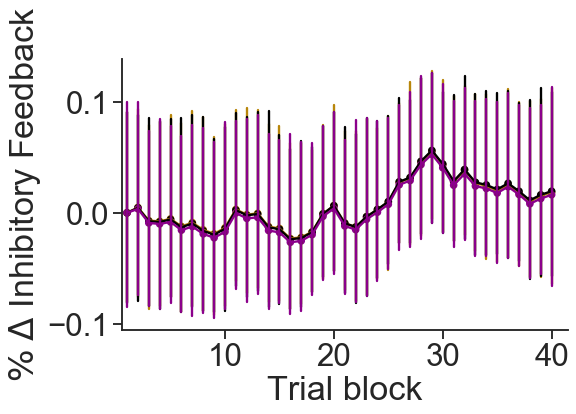

In [107]:
# Plot weight against blocks, averaged at each block, ofr the center laser time bin.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# plt.axhline(y=0, color="lightgray")

bin = 11

# R_02 = sns.pointplot( kind='point',data=mR_laserPairs_Diff_02, ci=95, color='green')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_04-np.mean(Ii_Laser_blocks_04[:,0]))/np.mean(Ii_Laser_blocks_04[:,0]), ci=95, color='darkgoldenrod')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_05-np.mean(Ii_Laser_blocks_05[:,0]))/np.mean(Ii_Laser_blocks_05[:,0]), ci=95, color='black')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_1-np.mean(Ii_Laser_blocks_1[:,0]))/np.mean(Ii_Laser_blocks_1[:,0]), ci=95, color='darkmagenta')

# sns.pointplot( kind='point',data=Ii_Laser_blocks_04, ci=95, color='darkgoldenrod')
# sns.pointplot( kind='point',data=Ii_Laser_blocks_05, ci=95, color='black')
# sns.pointplot( kind='point',data=Ii_Laser_blocks_1, ci=95, color='darkmagenta')



# plt.plot(np.transpose(Jei_Laser)[bin]-np.transpose(Jei_Laser)[bin][0])


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'$\%$ $\Delta$ Inhibitory Feedback')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(81,84)

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/Iicurrent_vary_f.pdf", bbox_inches="tight")

plt.show()

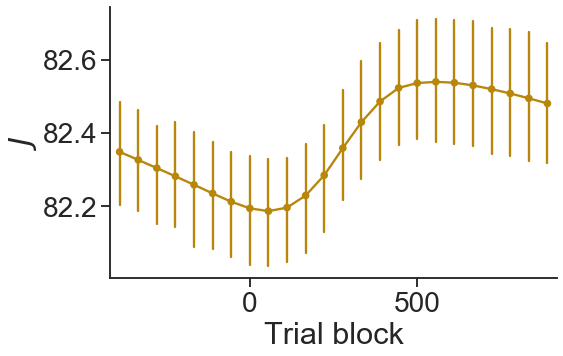

In [152]:
# Weights averaged over blocks and plotted against trial time.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# plt.axhline(y=0, color="lightgray")

bin = 11

R_04 = sns.pointplot( kind='point',data=Jei_Laser, ci=95, color='darkgoldenrod')

plt.xlabel(r'Trial block')
plt.ylabel(r'$J$')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([0,500])
plt.xticks((7,16))
# plt.xlim((-0.5,40.5))

# plt.ylim(0,10)

# plt.axvline(x=7, color='black',linestyle='--',linewidth=1.5)
# plt.axvline(x=16, color='black',linestyle='--',linewidth=1.5)

sns.despine()

plt.show()


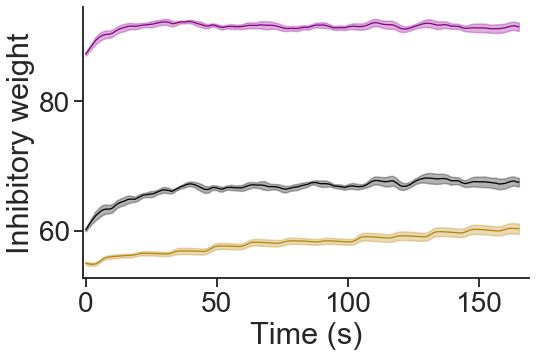

In [71]:
## Plot of ei weights for varying scaling factor 'f'.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})


mov_avg = 300

Jei_04=np.zeros((len(file_names04), 16800-mov_avg))
Jei_05=np.zeros((len(file_names05), 16800-mov_avg))
Jei_1=np.zeros((len(file_names1), 16800-mov_avg))
Jei_2=np.zeros((len(file_names2), 16800-mov_avg))


for realz in range(len(file_names04)):
    for i in range(16800-mov_avg):
        Jei_04[realz,i] = np.mean(TotalJei_04[realz,i:i+mov_avg])
for realz in range(len(file_names05)):
    for i in range(16800-mov_avg):
        Jei_05[realz,i] = np.mean(TotalJei_05[realz,i:i+mov_avg])
for realz in range(len(file_names1)):
    for i in range(16800-mov_avg):
        Jei_1[realz,i] = np.mean(TotalJei_1[realz,i:i+mov_avg])
for realz in range(len(file_names2)):
    for i in range(16800-mov_avg):
        Jei_2[realz,i] = np.mean(TotalJei_2[realz,i:i+mov_avg])
    
mean_1 = np.mean(Jei_04,axis=0)
std_1 = np.std(Jei_04,axis=0)/np.sqrt(len(file_names04))
mean_2 = np.mean(Jei_05,axis=0)
std_2 = np.std(Jei_05,axis=0)/np.sqrt(len(file_names05))
mean_3 = np.mean(Jei_1,axis=0)
std_3 = np.std(Jei_1,axis=0)/np.sqrt(len(file_names1))
mean_4 = np.mean(Jei_2,axis=0)
std_4 = np.std(Jei_2,axis=0)/np.sqrt(len(file_names2))


plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_1,color = 'darkgoldenrod',label='EE')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_1 - std_1, 
                 mean_1 + std_1,
                 color='darkgoldenrod', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_2,color = 'black', label='EI')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_2 - std_2, 
                 mean_2 + std_2,
                 color='black', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_3,color = 'darkmagenta', label='IE')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_3 - std_3, 
                 mean_3 + std_3,
                 color='darkmagenta', alpha=0.3)

# plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_4,color = 'darkgreen', label='II')

# plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_4 - std_4, 
#                  mean_4 + std_4,
#                  color='darkgreen', alpha=0.3)

sns.despine()

plt.xlim((-1,169))
# plt.yticks((50,70,90))
# plt.ylim((45,95))

plt.xlabel('Time (s)')
plt.ylabel('Inhibitory weight')

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/weights_all_scales_eiSTDP.pdf", bbox_inches="tight")

plt.show()

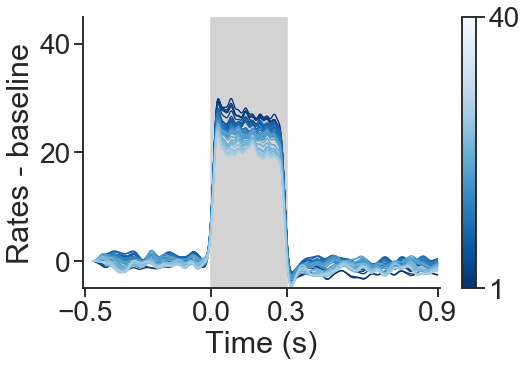

In [93]:
# PSTH of f=0.4, ei STDP, laser trials only.
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.mat') # Has currents and psth
PSTH_laserPairs_Laser = 1000*mat_contents['PSTH_laserPairs_Laser']
PSTH_laserPairs_Control = 1000*mat_contents['PSTH_laserPairs_Control']
# Smooth the psths
for i in range(len(PSTH_laserPairs_Laser[:,0])):
    PSTH_laserPairs_Laser[i,:] = gaussian_filter(PSTH_laserPairs_Laser[i,:],sigma=15)
    PSTH_laserPairs_Control[i,:] = gaussian_filter(PSTH_laserPairs_Control[i,:],sigma=15)
    

fig=plt.figure(figsize=(8,5))

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})


n = len(PSTH_laserPairs_Laser[:,0])
# Which bin should we take as first one?
bin = 0
a = PSTH_laserPairs_Laser[:,bin].reshape(np.int(NBlockTrials),1)
PSTH_lasercorrs_firstbin = np.tile(a, len(PSTH_laserPairs_Laser[0]))

color = cm.Blues_r(np.linspace(0,.65,n))
X = np.linspace(-0.47,0.9,1399) # We lose a one 30ms time bin.
Z = PSTH_laserPairs_Laser - PSTH_lasercorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rates - baseline')

# plt.title('Laser Trials')

plt.xticks((-0.5,0,0.3,0.9))
plt.xlim((-.51,0.91))
plt.ylim((-5,45))
plt.yticks((0,20,40))

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=80)
cmap = mpl.cm.ScalarMappable( cmap=mpl.cm.Blues_r)
cmap.set_clim( vmin=1, vmax=40)
cmap.set_array([])

fig.colorbar(cmap,ticks = [1,40])

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
                 color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/ratePSTH_awake_laser.pdf", bbox_inches="tight")


plt.show()

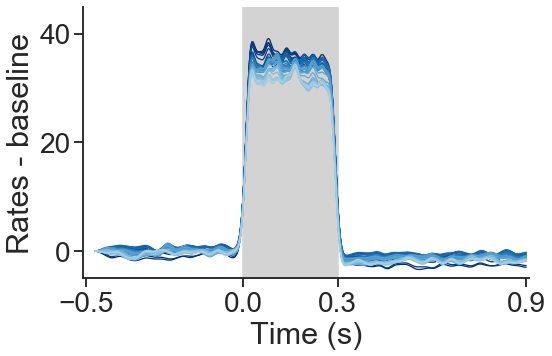

In [94]:
# PSTH of f=0.4, ei STDP, laser trials only.
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.4.mat') # Has currents and psth
PSTH_laserPairs_Laser = 1000*mat_contents['PSTH_laserPairs_Laser']
PSTH_laserPairs_Control = 1000*mat_contents['PSTH_laserPairs_Control']
# Smooth the psths
for i in range(len(PSTH_laserPairs_Laser[:,0])):
    PSTH_laserPairs_Laser[i,:] = gaussian_filter(PSTH_laserPairs_Laser[i,:],sigma=15)
    PSTH_laserPairs_Control[i,:] = gaussian_filter(PSTH_laserPairs_Control[i,:],sigma=15)
    

fig=plt.figure(figsize=(8,5))

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})


n = len(PSTH_laserPairs_Laser[:,0])
# Which bin should we take as first one?
bin = 0
a = PSTH_laserPairs_Laser[:,bin].reshape(np.int(NBlockTrials),1)
PSTH_lasercorrs_firstbin = np.tile(a, len(PSTH_laserPairs_Laser[0]))

color = cm.Blues_r(np.linspace(0,.65,n))
X = np.linspace(-0.47,0.9,1399) # We lose a one 30ms time bin.
Z = PSTH_laserPairs_Laser - PSTH_lasercorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rates - baseline')

# plt.title('Laser Trials')

plt.xticks((-0.5,0,0.3,0.9))
plt.xlim((-.51,0.91))
plt.ylim((-5,45))
plt.yticks((0,20,40))

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=80)
# cmap = mpl.cm.ScalarMappable( cmap=mpl.cm.Blues_r)
# cmap.set_clim( vmin=1, vmax=40)
# cmap.set_array([])

# fig.colorbar(cmap,ticks = [1,40])

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
                 color="lightgray", zorder=0 )

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/ratePSTH_rest_laser.pdf", bbox_inches="tight")


plt.show()

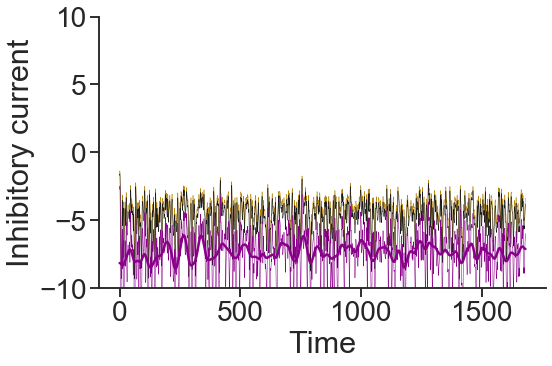

In [117]:
# Plot inhibitory current for increasing f.

for i in range(4):
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.4.mat') # Has currents and psth
    Ii_04 = mat_contents['IiCurrent'][0,::1]
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.5.mat') # Has currents and psth
    Ii_05 = mat_contents['IiCurrent'][0,::1]
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.mat') # Has currents and psth
    Ii_1 = mat_contents['IiCurrent'][0,::1]
#     mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_2.mat') # Has currents and psth
#     Ii_2 = mat_contents['IiCurrent']

# Start figure.
fig=plt.figure(figsize=(8,5))

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.05})

time_axx =np.linspace(0,len(Ii_04),int(len(Ii_04)))
time_axx = time_axx/100

plt.plot(time_axx,gaussian_filter(Ii_04,sigma=100),linewidth=.5,color='darkgoldenrod')
plt.plot(time_axx,gaussian_filter(Ii_05,sigma=100),linewidth=.5,color='k')
plt.plot(time_axx,gaussian_filter(Ii_1,sigma=100),linewidth=.5,color='darkmagenta')

# plt.plot(time_axx,Ii_04,linewidth=.02,color='darkgoldenrod')
# plt.plot(time_axx,Ii_05,linewidth=.02,color='k')
# plt.plot(time_axx,Ii_1,linewidth=2.02,color='darkmagenta')
plt.plot(time_axx,gaussian_filter(Ii_1,sigma=1000),linewidth=2.5,color='darkmagenta')


plt.xlabel('Time')
plt.ylabel('Inhibitory current')

# plt.title('Control Trials')

# plt.xticks((-0.5,168.5))
# plt.xlim((-0.5,168.5))


plt.ylim((-10,10))
# plt.yticks((0,20,40))

sns.despine()

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
# plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
#                  color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/Iicurrent_vary_f.pdf", bbox_inches="tight")


plt.show()

In [58]:
from scipy.ndimage import gaussian_filter
import matplotlib as mpl
from matplotlib import cm, colorbar 
from mpl_toolkits.mplot3d import Axes3D
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_90_scale_0.4.mat') #rest
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.6.mat') 
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.mat') #awake
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_nostdp.mat')
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_N5000_jei-500.mat')
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_ieSTDP.mat')
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_allSTDP.mat')
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.5.mat') # Pretty good. 
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_8_scale_1.mat') # Has currents and psth
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.mat') # Has currents and psth


TotalJee = mat_contents['TotalJee']
TotalJei = -mat_contents['TotalJei']
TotalJie = mat_contents['TotalJie']
TotalJii = -mat_contents['TotalJii']

timeRecord = np.arange(0,len(TotalJee[0]),step=1) /10000

NBlockTrials = mat_contents['NBlockTrials']
mR_laserPairs_Laser = mat_contents['mR_laserPairs_Laser']
mR_laserPairs_Control = mat_contents['mR_laserPairs_Control']
mR_stderr_laserPairs_Laser = mat_contents['mR_stderr_laserPairs_Laser']
mC_laserPairs_Control = mat_contents['mC_laserPairs_Control']
mC_laserPairs_Laser = mat_contents['mC_laserPairs_Laser']
mC_stderr_laserPairs_Control = mat_contents['mC_stderr_laserPairs_Control']
mC_stderr_laserPairs_Laser = mat_contents['mC_stderr_laserPairs_Laser']
Variance_laserPairs_Control = mat_contents['Variance_laserPairs_Control']
Variance_laserPairs_Laser = mat_contents['Variance_laserPairs_Laser']
Variance_stderr_laserPairs_Control = mat_contents['Variance_stderr_laserPairs_Control']
Variance_stderr_laserPairs_Laser = mat_contents['Variance_stderr_laserPairs_Laser']


Total_number_trials = np.float(mat_contents['Total_number_trials'][0,0])
TrialTime = np.float(mat_contents['TrialTime'][0,0])
dt=np.float(mat_contents['dt'][0][0])
ControlTrials = mat_contents['ControlTrials']
LaserTrials = mat_contents['LaserTrials']
FR_laserPairs_Laser = mat_contents['FR_laserPairs_Laser']
FR_laserPairs_Control = mat_contents['FR_laserPairs_Control']



PSTH_laserPairs_Laser = 1000*mat_contents['PSTH_laserPairs_Laser']
PSTH_laserPairs_Control = 1000*mat_contents['PSTH_laserPairs_Control']
Ii = mat_contents['IiCurrent']

# Smooth the psths
for i in range(len(PSTH_laserPairs_Laser[:,0])):
    PSTH_laserPairs_Laser[i,:] = gaussian_filter(PSTH_laserPairs_Laser[i,:],sigma=15)
    PSTH_laserPairs_Control[i,:] = gaussian_filter(PSTH_laserPairs_Control[i,:],sigma=15)



In [49]:
# set the colormap and centre the colorbar
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0.25, 0.5, 0.75] #[0.3, 0.5, 0.7]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

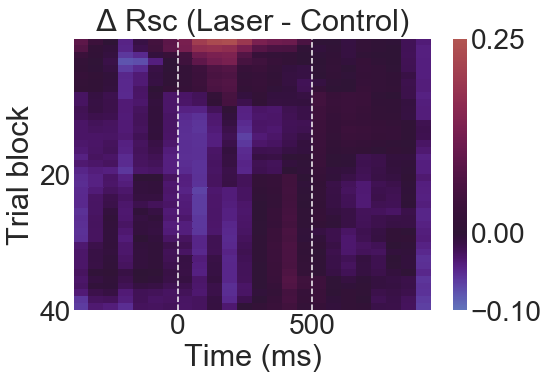

In [274]:
# Plot heatmap of corr, cov, var.
import seaborn as sns
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.mat') # Scale for rest: 0.4, for awake: 1.
NBlockTrials = mat_contents['NBlockTrials']
mR_laserPairs_Laser = mat_contents['mR_laserPairs_Laser']
mR_laserPairs_Control = mat_contents['mR_laserPairs_Control']
mR_stderr_laserPairs_Laser = mat_contents['mR_stderr_laserPairs_Laser']
mC_laserPairs_Control = mat_contents['mC_laserPairs_Control']
mC_laserPairs_Laser = mat_contents['mC_laserPairs_Laser']
mC_stderr_laserPairs_Control = mat_contents['mC_stderr_laserPairs_Control']
mC_stderr_laserPairs_Laser = mat_contents['mC_stderr_laserPairs_Laser']
Variance_laserPairs_Control = mat_contents['Variance_laserPairs_Control']
Variance_laserPairs_Laser = mat_contents['Variance_laserPairs_Laser']
Variance_stderr_laserPairs_Control = mat_contents['Variance_stderr_laserPairs_Control']
Variance_stderr_laserPairs_Laser = mat_contents['Variance_stderr_laserPairs_Laser']

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})

ax = sns.heatmap(mR_laserPairs_Laser-np.mean(mR_laserPairs_Control, axis=0),cmap='twilight',
                norm=MidpointNormalize(midpoint=0,vmin=-0,vmax=0),
                xticklabels= (0,500),
                yticklabels= (20,40),
                vmin=-0.1,vmax=0.25,
                rasterized=True
                )
plt.xticks((7,16))
plt.yticks((20,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7, color='white',linestyle='--',linewidth=1.5)
plt.axvline(x=16, color='white',linestyle='--',linewidth=1.5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-0.1, 0, 0.25])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
cax = plt.gcf().axes[-1]
cax.tick_params(size=0)

plt.title('$\Delta$ Rsc (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block')

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corr_heatmap_scale_1.pdf", bbox_inches="tight")

# fig.savefig("./PlotsForPaperWithAriana/corr_heatmap_rest.pdf", bbox_inches="tight")

plt.show()

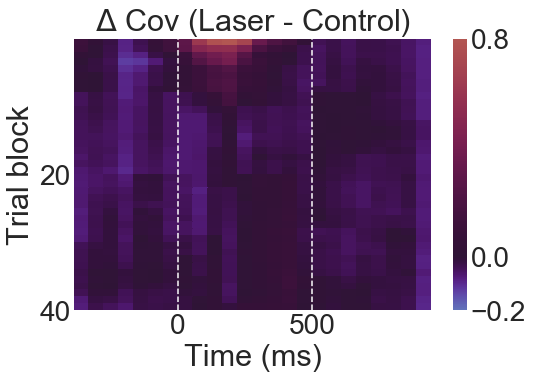

In [117]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})

ax = sns.heatmap(mC_laserPairs_Laser-np.mean(mC_laserPairs_Control, axis=0),cmap='twilight',
                norm=MidpointNormalize(midpoint=0,vmin=-0,vmax=0),
                xticklabels= (0,500),
                yticklabels= (20,40),
                vmin=-0.2,vmax=0.8,
                rasterized=True
                )
plt.xticks((7,16))
plt.yticks((20,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7, color='white',linestyle='--',linewidth=1.5)
plt.axvline(x=16, color='white',linestyle='--',linewidth=1.5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-0.2, 0, 0.8])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
cax = plt.gcf().axes[-1]
cax.tick_params(size=0)

plt.title('$\Delta$ Cov (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block')

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/cov_heatmap_scale_1.pdf", bbox_inches="tight")


# fig.savefig("./PlotsForPaperWithAriana/corr_heatmap_rest.pdf", bbox_inches="tight")

plt.show()

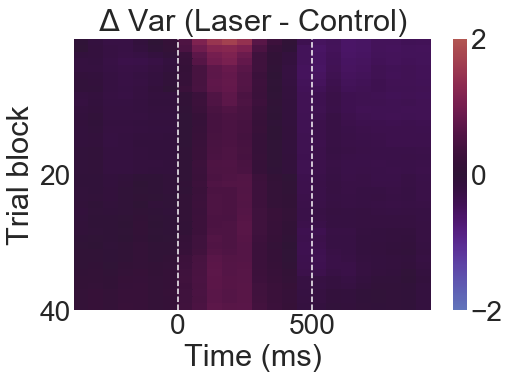

In [118]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})

ax = sns.heatmap(Variance_laserPairs_Laser-np.mean(Variance_laserPairs_Control, axis=0),cmap='twilight',
                norm=MidpointNormalize(midpoint=0,vmin=-0,vmax=0),
                xticklabels= (0,500),
                yticklabels= (20,40),
                vmin=-2,vmax=2,
                rasterized=True
                )
plt.xticks((7,16))
plt.yticks((20,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7, color='white',linestyle='--',linewidth=1.5)
plt.axvline(x=16, color='white',linestyle='--',linewidth=1.5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-2, 0, 2])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
cax = plt.gcf().axes[-1]
cax.tick_params(size=0)

plt.title('$\Delta$ Var (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block')

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/var_heatmap_scale_1.pdf", bbox_inches="tight")


# fig.savefig("./PlotsForPaperWithAriana/corr_heatmap_rest.pdf", bbox_inches="tight")

plt.show()

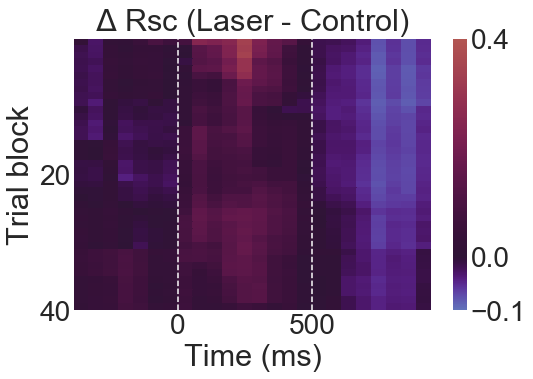

In [278]:
# Plot heatmap of corr for rest f=0.4.
import seaborn as sns
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_4_scale_0.4.mat') # Has currents and psth
NBlockTrials = mat_contents['NBlockTrials']
mR_laserPairs_Laser = mat_contents['mR_laserPairs_Laser']
mR_laserPairs_Control = mat_contents['mR_laserPairs_Control']
mR_stderr_laserPairs_Laser = mat_contents['mR_stderr_laserPairs_Laser']
mC_laserPairs_Control = mat_contents['mC_laserPairs_Control']
mC_laserPairs_Laser = mat_contents['mC_laserPairs_Laser']
mC_stderr_laserPairs_Control = mat_contents['mC_stderr_laserPairs_Control']
mC_stderr_laserPairs_Laser = mat_contents['mC_stderr_laserPairs_Laser']
Variance_laserPairs_Control = mat_contents['Variance_laserPairs_Control']
Variance_laserPairs_Laser = mat_contents['Variance_laserPairs_Laser']
Variance_stderr_laserPairs_Control = mat_contents['Variance_stderr_laserPairs_Control']
Variance_stderr_laserPairs_Laser = mat_contents['Variance_stderr_laserPairs_Laser']

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})

ax = sns.heatmap(mR_laserPairs_Laser-np.mean(mR_laserPairs_Control, axis=0),cmap='twilight',
                norm=MidpointNormalize(midpoint=0,vmin=-0,vmax=0),
                xticklabels= (0,500),
                yticklabels= (20,40),
                vmin=-0.1,vmax=0.4,
                rasterized=True
                )
plt.xticks((7,16))
plt.yticks((20,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7, color='white',linestyle='--',linewidth=1.5)
plt.axvline(x=16, color='white',linestyle='--',linewidth=1.5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-0.1, 0, 0.4])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
cax = plt.gcf().axes[-1]
cax.tick_params(size=0)

plt.title('$\Delta$ Rsc (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block')

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corr_heatmap_scale_04.pdf", bbox_inches="tight")

# fig.savefig("./PlotsForPaperWithAriana/corr_heatmap_rest.pdf", bbox_inches="tight")

plt.show()

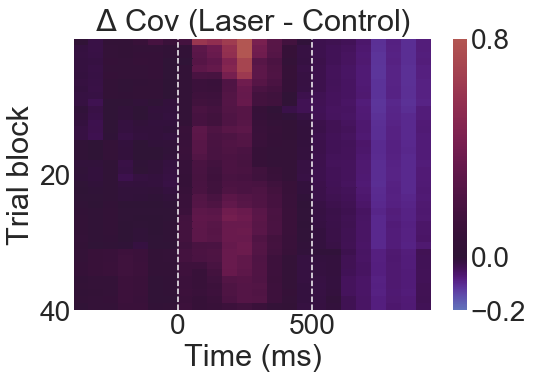

In [279]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})

ax = sns.heatmap(mC_laserPairs_Laser-np.mean(mC_laserPairs_Control, axis=0),cmap='twilight',
                norm=MidpointNormalize(midpoint=0,vmin=-0,vmax=0),
                xticklabels= (0,500),
                yticklabels= (20,40),
                vmin=-0.2,vmax=0.8,
                rasterized=True
                )
plt.xticks((7,16))
plt.yticks((20,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7, color='white',linestyle='--',linewidth=1.5)
plt.axvline(x=16, color='white',linestyle='--',linewidth=1.5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-0.2, 0, 0.8])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
cax = plt.gcf().axes[-1]
cax.tick_params(size=0)

plt.title('$\Delta$ Cov (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block')

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/cov_heatmap_scale_04.pdf", bbox_inches="tight")


# fig.savefig("./PlotsForPaperWithAriana/corr_heatmap_rest.pdf", bbox_inches="tight")

plt.show()

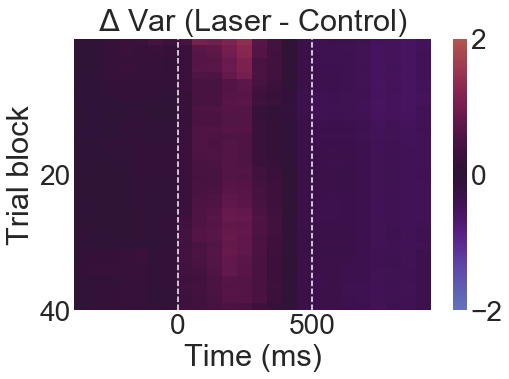

In [280]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})

ax = sns.heatmap(Variance_laserPairs_Laser-np.mean(Variance_laserPairs_Control, axis=0),cmap='twilight',
                norm=MidpointNormalize(midpoint=0,vmin=-0,vmax=0),
                xticklabels= (0,500),
                yticklabels= (20,40),
                vmin=-2,vmax=2,
                rasterized=True
                )
plt.xticks((7,16))
plt.yticks((20,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7, color='white',linestyle='--',linewidth=1.5)
plt.axvline(x=16, color='white',linestyle='--',linewidth=1.5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-2, 0, 2])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
cax = plt.gcf().axes[-1]
cax.tick_params(size=0)

plt.title('$\Delta$ Var (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block')

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/var_heatmap_scale_04.pdf", bbox_inches="tight")


# fig.savefig("./PlotsForPaperWithAriana/corr_heatmap_rest.pdf", bbox_inches="tight")

plt.show()

## Supplementary fig #2: Vary stimulation frequency for EI STDP only

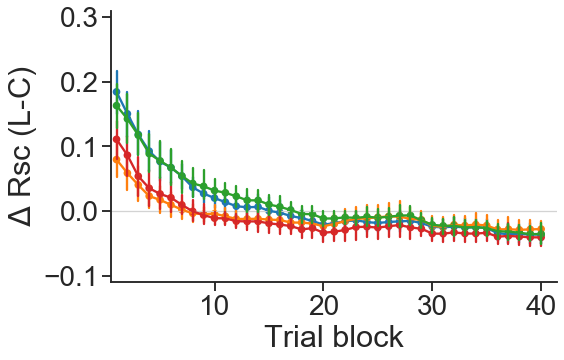

In [49]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

bin = 11

R_1 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1, ci=95, color='tab:blue') # Freq = 35Hz
R_1_freq_10 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_freq_10, ci=95, color='tab:orange') #10
R_1_freq_10 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_freq_20, ci=95, color='tab:red') #20
R_1_freq_100 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_freq_100, ci=95, color='tab:green') #100

plt.xlabel(r'Trial block')
plt.ylabel(r'$\Delta$ Rsc (L-C)')

# plt.title('Center time bin in laser period')
plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

plt.ylim(-0.11,0.31)

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/Suppl_corr_laserfreq_eiSTDP.pdf", bbox_inches="tight")

plt.show()

In [45]:
## Compute the weights sliding a window over realizations and trials for a single time bin.
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_freq_10.mat')
ControlTrials = mat_contents['ControlTrials']
LaserTrials = mat_contents['LaserTrials'][0]
Total_number_trials = int(mat_contents['Total_number_trials'][0,0])

block_slide_size = 20; # = how many trials in one block.
NBlockTrials = int(len(LaserTrials)-block_slide_size)
bin=11

# Weights for f=1, ei STDP, freq=10Hz.
Jei_Control_blocks_10 = np.zeros((len(file_names1_freq_10),Num_trials))
Jei_Laser_blocks_10 = np.zeros((len(file_names1_freq_10),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
realz=0
for file in file_names1_freq_10:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jei_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jei_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Control[BlockTrial,window] = Jei_Control[BlockTrial,window] + np.mean(TotalJei_1_freq_10[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Laser[BlockTrial,window] = Jei_Laser[BlockTrial,window] + np.mean(TotalJei_1_freq_10[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jei_Control = Jei_Control / block_slide_size
    Jei_Laser = Jei_Laser / block_slide_size
    for trial in range(Num_trials):
        Jei_Laser_blocks_10[realz,trial] = Jei_Laser[trial,bin]
        Jei_Control_blocks_10[realz,trial] = Jei_Control[trial,bin]
    
    realz+=1
    
# Weights for f=1, ei STDP, freq=20Hz.
Jei_Control_blocks_20 = np.zeros((len(file_names1_freq_20),Num_trials))
Jei_Laser_blocks_20 = np.zeros((len(file_names1_freq_20),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
realz=0
for file in file_names1_freq_20:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jei_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jei_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Control[BlockTrial,window] = Jei_Control[BlockTrial,window] + np.mean(TotalJei_1_freq_20[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Laser[BlockTrial,window] = Jei_Laser[BlockTrial,window] + np.mean(TotalJei_1_freq_20[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jei_Control = Jei_Control / block_slide_size
    Jei_Laser = Jei_Laser / block_slide_size
    for trial in range(Num_trials):
        Jei_Laser_blocks_20[realz,trial] = Jei_Laser[trial,bin]
        Jei_Control_blocks_20[realz,trial] = Jei_Control[trial,bin]
    
    realz+=1    

    
# Weights for f=1, ei STDP, freq=100Hz.
Jei_Control_blocks_100 = np.zeros((len(file_names1_freq_100),Num_trials))
Jei_Laser_blocks_100 = np.zeros((len(file_names1_freq_100),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
realz=0
for file in file_names1_freq_100:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jei_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jei_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Control[BlockTrial,window] = Jei_Control[BlockTrial,window] + np.mean(TotalJei_1_freq_100[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Laser[BlockTrial,window] = Jei_Laser[BlockTrial,window] + np.mean(TotalJei_1_freq_100[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jei_Control = Jei_Control / block_slide_size
    Jei_Laser = Jei_Laser / block_slide_size
    for trial in range(Num_trials):
        Jei_Laser_blocks_100[realz,trial] = Jei_Laser[trial,bin]
        Jei_Control_blocks_100[realz,trial] = Jei_Control[trial,bin]
    
    realz+=1
    
# Weights for f=1, ei STDP.
Jei_Control_blocks_35 = np.zeros((len(file_names1),Num_trials))
Jei_Laser_blocks_35 = np.zeros((len(file_names1),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
realz=0
for file in file_names1:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jei_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jei_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Control[BlockTrial,window] = Jei_Control[BlockTrial,window] + np.mean(TotalJei_1[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Laser[BlockTrial,window] = Jei_Laser[BlockTrial,window] + np.mean(TotalJei_1[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jei_Control = Jei_Control / block_slide_size
    Jei_Laser = Jei_Laser / block_slide_size
    for trial in range(Num_trials):
        Jei_Laser_blocks_35[realz,trial] = Jei_Laser[trial,bin]
        Jei_Control_blocks_35[realz,trial] = Jei_Control[trial,bin]
    
    realz+=1


In [198]:
## Compute the Inhibitory current sliding a window over realizations and trials for a single time bin.
winsize = int(mat_contents['winsize'][0,0]/1)
sliding_window = int(mat_contents['sliding_window'][0,0]/1)
TrialTime = mat_contents['TrialTime'][0,0]
LaserTrials = mat_contents['LaserTrials'][0]
ControlTrials = mat_contents['ControlTrials'][:,0]
Total_number_trials = mat_contents['Total_number_trials'][0,0]

Number_of_points_Ii = int((TrialTime/winsize-1)*(winsize/sliding_window))

block_slide_size = 20; # = how many trials in one block.
NBlockTrials = int(len(LaserTrials)-block_slide_size)
bin=11

# Ii for f=1, ei STDP, freq=10Hz.
Ii_Control_blocks_10 = np.zeros((len(file_names1_freq_10),Num_trials))
Ii_Laser_blocks_10 = np.zeros((len(file_names1_freq_10),Num_trials))
realz=0
for file in file_names1_freq_10:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_10[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_10[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1
    
# Ii for f=1, ei STDP, freq=20Hz.
Ii_Control_blocks_20 = np.zeros((len(file_names1_freq_20),Num_trials))
Ii_Laser_blocks_20 = np.zeros((len(file_names1_freq_20),Num_trials))
realz=0
for file in file_names1_freq_20:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_20[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_20[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1
    
    
# Ii for f=1, ei STDP, freq=100Hz.
Ii_Control_blocks_100 = np.zeros((len(file_names1_freq_100),Num_trials))
Ii_Laser_blocks_100 = np.zeros((len(file_names1_freq_100),Num_trials))
realz=0
for file in file_names1_freq_100:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_100[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_100[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1
    
    
# Ii for f=1, ei STDP, freq=35Hz.
Ii_Control_blocks_35 = np.zeros((len(file_names1),Num_trials))
Ii_Laser_blocks_35 = np.zeros((len(file_names1),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/1)
sliding_window = int(mat_contents['sliding_window'][0,0]/1)
Number_of_points_Ii = int((TrialTime/winsize-1)*(winsize/sliding_window))
TrialTime = int(mat_contents['TrialTime'][0,0]/1)
realz=0
for file in file_names1:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_35[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_35[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1


KeyError: 'IiCurrent_stim'

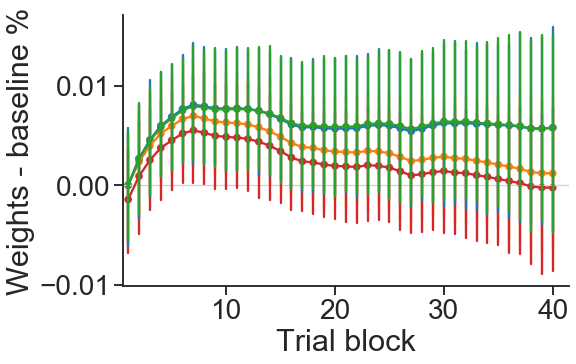

In [50]:
# Plot weight against blocks, averaged at each block for the center laser time bin.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

sns.pointplot( kind='point',data=(Jei_Laser_blocks_10-np.mean(Jei_Laser_blocks_10[:,0]))/np.mean(Jei_Laser_blocks_10[:,0]), ci=95, color='tab:orange')
sns.pointplot( kind='point',data=(Jei_Laser_blocks_10-np.mean(Jei_Laser_blocks_20[:,0]))/np.mean(Jei_Laser_blocks_20[:,0]), ci=95, color='tab:red')
sns.pointplot( kind='point',data=(Jei_Laser_blocks_35-np.mean(Jei_Laser_blocks_35[:,0]))/np.mean(Jei_Laser_blocks_35[:,0]), ci=95, color='tab:blue')
sns.pointplot( kind='point',data=(Jei_Laser_blocks_100-np.mean(Jei_Laser_blocks_100[:,0]))/np.mean(Jei_Laser_blocks_100[:,0]), ci=95, color='tab:green')

# plt.plot(np.transpose(Jei_Laser)[bin]-np.transpose(Jei_Laser)[bin][0])


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'Weights - baseline %')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(81,84)

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/weights_all_freq_eiSTDP.pdf", bbox_inches="tight")

plt.show()

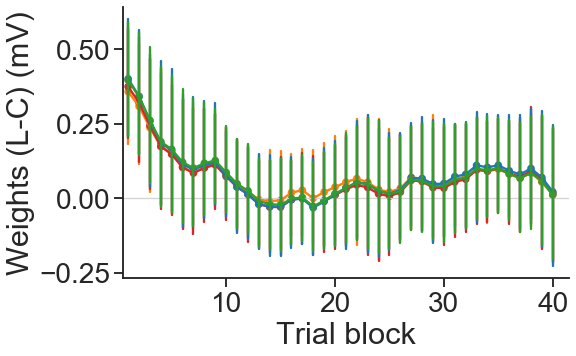

In [51]:
# Plot weight against blocks, averaged at each block for the center laser time bin.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

# sns.pointplot( kind='point',data=(Jei_Laser_blocks_04-np.mean(Jei_Control_blocks_04[:,0])), ci=95, color='darkgoldenrod')
# sns.pointplot( kind='point',data=(Jei_Laser_blocks_05-np.mean(Jei_Control_blocks_05[:,0])), ci=95, color='black')
# sns.pointplot( kind='point',data=(Jei_Laser_blocks_1-np.mean(Jei_Control_blocks_1[:,0])), ci=95, color='darkmagenta')


sns.pointplot( kind='point',data=-(Jei_Laser_blocks_10-Jei_Control_blocks_10), ci=95, color='tab:orange')
sns.pointplot( kind='point',data=-(Jei_Laser_blocks_20-Jei_Control_blocks_20), ci=95, color='tab:red')
sns.pointplot( kind='point',data=-(Jei_Laser_blocks_35-Jei_Control_blocks_35), ci=95, color='tab:blue')
sns.pointplot( kind='point',data=-(Jei_Laser_blocks_100-Jei_Control_blocks_100), ci=95, color='tab:green')



# plt.plot(np.transpose(Jei_Laser)[bin]-np.transpose(Jei_Laser)[bin][0])


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'Weights (L-C) (mV)')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(81,84)

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/weights_all_freq_eiSTDP_laserminuscontrol.pdf", bbox_inches="tight")

plt.show()

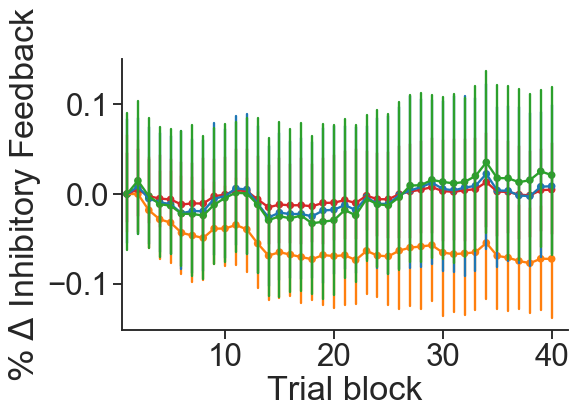

In [197]:
# Plot weight against blocks, averaged at each block, ofr the center laser time bin.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# plt.axhline(y=0, color="lightgray")

bin = 11

# R_02 = sns.pointplot( kind='point',data=mR_laserPairs_Diff_02, ci=95, color='green')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_10-np.mean(Ii_Laser_blocks_10[:,0]))/np.mean(Ii_Laser_blocks_10[:,0]), ci=95, color='tab:orange')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_20-np.mean(Ii_Laser_blocks_20[:,0]))/np.mean(Ii_Laser_blocks_10[:,0]), ci=95, color='tab:red')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_35-np.mean(Ii_Laser_blocks_35[:,0]))/np.mean(Ii_Laser_blocks_35[:,0]), ci=95, color='tab:blue')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_100-np.mean(Ii_Laser_blocks_100[:,0]))/np.mean(Ii_Laser_blocks_100[:,0]), ci=95, color='tab:green')

# sns.pointplot( kind='point',data=Ii_Laser_blocks_04, ci=95, color='darkgoldenrod')
# sns.pointplot( kind='point',data=Ii_Laser_blocks_05, ci=95, color='black')
# sns.pointplot( kind='point',data=Ii_Laser_blocks_1, ci=95, color='darkmagenta')



# plt.plot(np.transpose(Jei_Laser)[bin]-np.transpose(Jei_Laser)[bin][0])


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'$\%$ $\Delta$ Inhibitory Feedback')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(81,84)

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/Iicurrent_vary_freq.pdf", bbox_inches="tight")

plt.show()

In [869]:
Num_trials = 40 # One early, one late
Num_bins = 24
file_names = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_10_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_20_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_30_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_40_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_60_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1.mat']
file_names1_N5000_jei_500 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1_N5000_jei-500.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1_N5000_jei-500.mat']
file_names2 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_2.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_2.mat']
file_names15 = ['./ArianaVariables_ee_ei_ie_ii_seed_0_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_4_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_5_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_6_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_7_scale_1.5.mat',
              './ArianaVariables_ee_ei_ie_ii_seed_8_scale_1.5.mat']
Num_realizations = len(file_names2)
mR_laserPairs_Diff_early = np.zeros((Num_realizations,Num_bins))
mR_laserPairs_Diff_middle = np.zeros((Num_realizations,Num_bins))
mR_laserPairs_Diff_late = np.zeros((Num_realizations,Num_bins))
TotalJei = np.zeros((Num_realizations,16800))
realz=0
for file in file_names15:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    for bin in range(Num_bins):
        mR_laserPairs_Diff_early[realz,bin] = mat_contents['mR_laserPairs_Laser'][0,bin] - np.mean(mat_contents['mR_laserPairs_Control'][:,bin])
        mR_laserPairs_Diff_middle[realz,bin] = mat_contents['mR_laserPairs_Laser'][10,bin] - np.mean(mat_contents['mR_laserPairs_Control'][:,bin])
        mR_laserPairs_Diff_late[realz,bin] = mat_contents['mR_laserPairs_Laser'][39,bin] - np.mean(mat_contents['mR_laserPairs_Control'][:,bin])
    TotalJei[realz,:] = -mat_contents['TotalJei'][0][::100]
    realz+=1   

mR_laserPairs_Diff_early = pd.DataFrame(mR_laserPairs_Diff_early)
mR_laserPairs_Diff_late = pd.DataFrame(mR_laserPairs_Diff_late)
Number_of_points_corr = float(mat_contents['Number_of_points_corr'][0][0])
sliding_window = float(mat_contents['sliding_window'][0][0])
winsize = mat_contents['winsize'][0][0]
laserOnSet = mat_contents['laserOnSet'][0][0]/1000 - winsize/1000
time_axis = np.arange(0, Number_of_points_corr * sliding_window, sliding_window)/1000 - laserOnSet


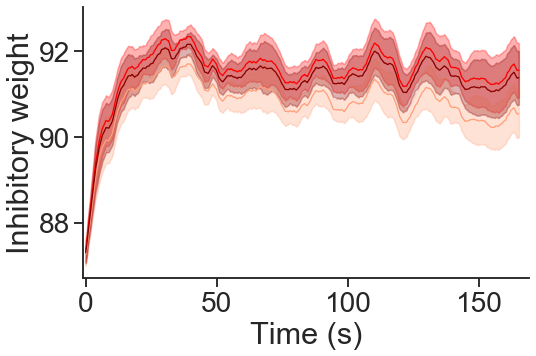

In [234]:
## Plot of ei weights for varying scaling factor 'f'.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# mean_Jei = np.mean(TotalJei,axis=0)
# stderr_Jei = np.std(TotalJei,axis=0)/np.sqrt(Num_realizations)

mov_avg = 300

Jei_1=np.zeros((len(file_names1), 16800-mov_avg))
Jei_1_freq_10=np.zeros((len(file_names1_freq_10), 16800-mov_avg))
Jei_1_freq_100=np.zeros((len(file_names1_freq_100), 16800-mov_avg))


for realz in range(len(file_names1)):
    for i in range(16800-mov_avg):
        Jei_1[realz,i] = np.mean(TotalJei_1[realz,i:i+mov_avg])
for realz in range(len(file_names1_freq_10)):
    for i in range(16800-mov_avg):
        Jei_1_freq_10[realz,i] = np.mean(TotalJei_1_freq_10[realz,i:i+mov_avg])
for realz in range(len(file_names1_freq_100)):
    for i in range(16800-mov_avg):
        Jei_1_freq_100[realz,i] = np.mean(TotalJei_1_freq_100[realz,i:i+mov_avg])

    
mean_1 = np.mean(Jei_1,axis=0)
std_1 = np.std(Jei_1,axis=0)/np.sqrt(len(file_names1))
mean_2 = np.mean(Jei_1_freq_10,axis=0)
std_2 = np.std(Jei_1_freq_10,axis=0)/np.sqrt(len(file_names1_freq_10))
mean_3 = np.mean(Jei_1_freq_100,axis=0)
std_3 = np.std(Jei_1_freq_100,axis=0)/np.sqrt(len(file_names1_freq_100))



plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_1,color = 'red',label='EE')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_1 - std_1, 
                 mean_1 + std_1,
                 color='red', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_2,color = 'lightsalmon', label='EI')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_2 - std_2, 
                 mean_2 + std_2,
                 color='lightsalmon', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_3,color = 'darkred', label='IE')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_3 - std_3, 
                 mean_3 + std_3,
                 color='darkred', alpha=0.3)

# plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_4,color = 'darkgreen', label='II')

# plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_4 - std_4, 
#                  mean_4 + std_4,
#                  color='darkgreen', alpha=0.3)

# plt.plot(TotalJie_1_ieSTDP[7])

# plt.legend(fontsize=15)

sns.despine()

plt.xlim((-1,169))
# plt.yticks((50,70,90))
# plt.ylim((45,95))

plt.xlabel('Time (s)')
plt.ylabel('Inhibitory weight')

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/weights_all_freq_eiSTDP.pdf", bbox_inches="tight")

plt.show()

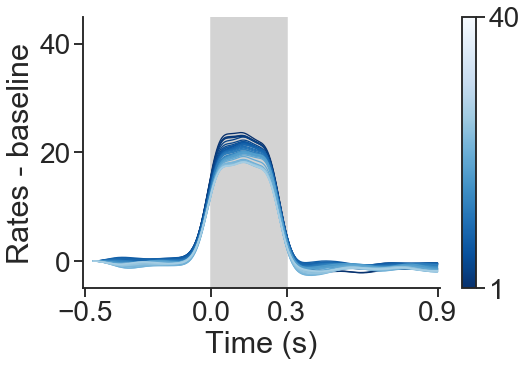

In [156]:
# PSTH of f=1, freq=10Hz, ei STDP, laser trials only.
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_10.mat') # Has currents and psth
PSTH_laserPairs_Laser = 1000*mat_contents['PSTH_laserPairs_Laser']
PSTH_laserPairs_Control = 1000*mat_contents['PSTH_laserPairs_Control']
# Smooth the psths
for i in range(len(PSTH_laserPairs_Laser[:,0])):
    PSTH_laserPairs_Laser[i,:] = gaussian_filter(PSTH_laserPairs_Laser[i,:],sigma=50)
    PSTH_laserPairs_Control[i,:] = gaussian_filter(PSTH_laserPairs_Control[i,:],sigma=15)
    

fig=plt.figure(figsize=(8,5))

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})


n = len(PSTH_laserPairs_Laser[:,0])
# Which bin should we take as first one?
bin = 0
a = PSTH_laserPairs_Laser[:,bin].reshape(np.int(NBlockTrials),1)
PSTH_lasercorrs_firstbin = np.tile(a, len(PSTH_laserPairs_Laser[0]))

color = cm.Blues_r(np.linspace(0,.65,n))
X = np.linspace(-0.47,0.9,1399) # We lose a one 30ms time bin.
Z = PSTH_laserPairs_Laser - PSTH_lasercorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rates - baseline')

# plt.title('Laser Trials')

plt.xticks((-0.5,0,0.3,0.9))
plt.xlim((-.51,0.91))
plt.ylim((-5,45))
plt.yticks((0,20,40))

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=80)
cmap = mpl.cm.ScalarMappable( cmap=mpl.cm.Blues_r)
cmap.set_clim( vmin=1, vmax=40)
cmap.set_array([])

fig.colorbar(cmap,ticks = [1,40])

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
                 color="lightgray", zorder=0 )

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/ratePSTH_freq10_laser.pdf", bbox_inches="tight")


plt.show()

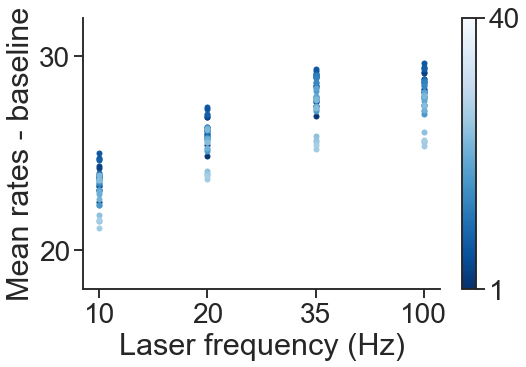

In [55]:
# PSTH for varying frequencies f=1, ei STDP, laser trials only.
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_10.mat') # Has currents and psth
rate_laserPairs_Laser_10Hz = 1000*mat_contents['PSTH_laserPairs_Laser']
rate_laserPairs_Control_10Hz = 1000*mat_contents['PSTH_laserPairs_Control']
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_20.mat') # Has currents and psth
rate_laserPairs_Laser_20Hz = 1000*mat_contents['PSTH_laserPairs_Laser']
rate_laserPairs_Control_20Hz = 1000*mat_contents['PSTH_laserPairs_Control']
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.mat') # Has currents and psth
rate_laserPairs_Laser_35Hz = 1000*mat_contents['PSTH_laserPairs_Laser']
rate_laserPairs_Control_35Hz = 1000*mat_contents['PSTH_laserPairs_Control']
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_100.mat') # Has currents and psth
rate_laserPairs_Laser_100Hz = 1000*mat_contents['PSTH_laserPairs_Laser']
rate_laserPairs_Control_100Hz = 1000*mat_contents['PSTH_laserPairs_Control']

mean_rate_laser_10Hz = np.zeros((len(rate_laserPairs_Laser_10Hz),1))
mean_rate_laser_20Hz = np.zeros((len(rate_laserPairs_Laser_20Hz),1))
mean_rate_laser_35Hz = np.zeros((len(rate_laserPairs_Laser_35Hz),1))
mean_rate_laser_100Hz = np.zeros((len(rate_laserPairs_Laser_100Hz),1))
for i in range(len(rate_laserPairs_Laser_10Hz)):
    mean_rate_laser_10Hz[i] = np.mean(rate_laserPairs_Laser_10Hz[i,500:800]) # Average over laser period.
    mean_rate_laser_20Hz[i] = np.mean(rate_laserPairs_Laser_20Hz[i,500:800]) # Average over laser period.
    mean_rate_laser_35Hz[i] = np.mean(rate_laserPairs_Laser_35Hz[i,500:800]) # Average over laser period.
    mean_rate_laser_100Hz[i] = np.mean(rate_laserPairs_Laser_100Hz[i,500:800]) # Average over laser period.

    
fig=plt.figure(figsize=(8,5))

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

#10Hz
n = len(rate_laserPairs_Laser_10Hz[:,0])

a = rate_laserPairs_Laser_10Hz
PSTH_lasercorrs_firstbin = rate_laserPairs_Laser_10Hz[:,0]

color = cm.Blues_r(np.linspace(0,.65,n))
X = 1 # We lose a one 30ms time bin.
Z = mean_rate_laser_10Hz[0] - PSTH_lasercorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i],c=c, markersize=5,marker='o')
    
#20Hz
n = len(rate_laserPairs_Laser_20Hz[:,0])

a = rate_laserPairs_Laser_20Hz
PSTH_lasercorrs_firstbin = rate_laserPairs_Laser_20Hz[:,0]

color = cm.Blues_r(np.linspace(0,.65,n))
X = 2 # We lose a one 30ms time bin.
Z = mean_rate_laser_20Hz[0] - PSTH_lasercorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i],c=c, markersize=5,marker='o')

#35Hz
n = len(rate_laserPairs_Laser_35Hz[:,0])

a = rate_laserPairs_Laser_35Hz
PSTH_lasercorrs_firstbin = rate_laserPairs_Laser_35Hz[:,0]

color = cm.Blues_r(np.linspace(0,.65,n))
X = 3 # We lose a one 30ms time bin.
Z = mean_rate_laser_35Hz[0] - PSTH_lasercorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i],c=c, markersize=5,marker='o')

    
#100Hz
n = len(rate_laserPairs_Laser_100Hz[:,0])

a = rate_laserPairs_Laser_100Hz
PSTH_lasercorrs_firstbin = rate_laserPairs_Laser_100Hz[:,0]

color = cm.Blues_r(np.linspace(0,.65,n))
X = 4 # We lose a one 30ms time bin.
Z = mean_rate_laser_100Hz[0] - PSTH_lasercorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i],c=c, markersize=5,marker='o')
    
    

plt.xlabel('Laser frequency (Hz)')
plt.ylabel('Mean rates - baseline')

# plt.title('Laser Trials')

# plt.xticks((-0.5,0,0.3,0.9))
# plt.xlim((-.51,0.91))
plt.ylim((18,32))
plt.yticks((20,30))

plt.xticks([1,2,3,4], ['10','20', '35', '100'])

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=80)
cmap = mpl.cm.ScalarMappable( cmap=mpl.cm.Blues_r)
cmap.set_clim( vmin=1, vmax=40)
cmap.set_array([])

fig.colorbar(cmap,ticks = [1,40])

# xlim=np.array(plt.gca().get_xlim())
# ylim=np.array(plt.gca().get_ylim())
# plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
#                  color="lightgray", zorder=0 )

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/rate_vary_freq_laser.pdf", bbox_inches="tight")


plt.show()

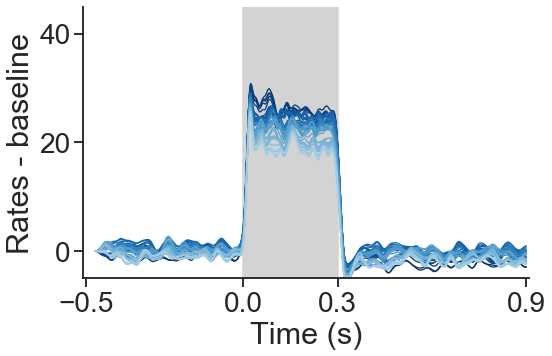

In [184]:
# PSTH of f=0.4, ei STDP, laser trials only.
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_100.mat') # Has currents and psth
PSTH_laserPairs_Laser = 1000*mat_contents['PSTH_laserPairs_Laser']
PSTH_laserPairs_Control = 1000*mat_contents['PSTH_laserPairs_Control']
# Smooth the psths
for i in range(len(PSTH_laserPairs_Laser[:,0])):
    PSTH_laserPairs_Laser[i,:] = gaussian_filter(PSTH_laserPairs_Laser[i,:],sigma=10)
    PSTH_laserPairs_Control[i,:] = gaussian_filter(PSTH_laserPairs_Control[i,:],sigma=15)
    

fig=plt.figure(figsize=(8,5))

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})


n = len(PSTH_laserPairs_Laser[:,0])
# Which bin should we take as first one?
bin = 0
a = PSTH_laserPairs_Laser[:,bin].reshape(np.int(NBlockTrials),1)
PSTH_lasercorrs_firstbin = np.tile(a, len(PSTH_laserPairs_Laser[0]))

color = cm.Blues_r(np.linspace(0,.65,n))
X = np.linspace(-0.47,0.9,1399) # We lose a one 30ms time bin.
Z = PSTH_laserPairs_Laser - PSTH_lasercorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rates - baseline')

# plt.title('Laser Trials')

plt.xticks((-0.5,0,0.3,0.9))
plt.xlim((-.51,0.91))
plt.ylim((-5,45))
plt.yticks((0,20,40))

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=80)
# cmap = mpl.cm.ScalarMappable( cmap=mpl.cm.Blues_r)
# cmap.set_clim( vmin=1, vmax=40)
# cmap.set_array([])

# fig.colorbar(cmap,ticks = [1,40])

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
                 color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/ratePSTH_freq100_laser.pdf", bbox_inches="tight")


plt.show()

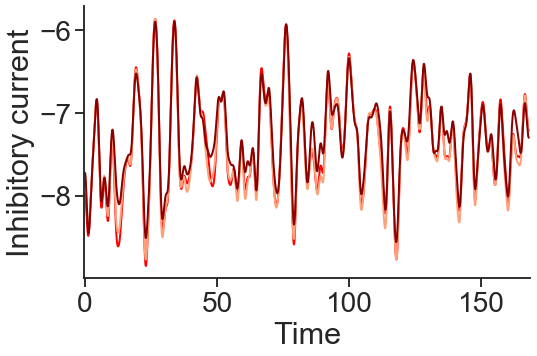

In [268]:
# Plot inhibitory current for increasing f.

for i in range(4):
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.mat') # Has currents and psth
    Ii_35 = mat_contents['IiCurrent'][0,::10]
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_10.mat') # Has currents and psth
    Ii_10 = mat_contents['IiCurrent'][0,::10]
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_100.mat') # Has currents and psth
    Ii_100 = mat_contents['IiCurrent'][0,::10]
#     mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_2.mat') # Has currents and psth
#     Ii_2 = mat_contents['IiCurrent']

# Start figure.
fig=plt.figure(figsize=(8,5))

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.05})

time_axx =np.linspace(0,len(Ii_35),int(len(Ii_35)))

plt.plot(time_axx/100,gaussian_filter(Ii_35,sigma=80),linewidth=2,color='red')
plt.plot(time_axx/100,gaussian_filter(Ii_10,sigma=80),linewidth=2,color='lightsalmon')
plt.plot(time_axx/100,gaussian_filter(Ii_100,sigma=80),linewidth=2,color='darkred')

plt.xlabel('Time')
plt.ylabel('Inhibitory current')

# plt.title('Control Trials')

# plt.xticks((-0.5,168.5))
plt.xlim((-0.5,168.5))
# plt.ylim((-5,45))
# plt.yticks((0,20,40))

sns.despine()

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
# plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
#                  color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/Iicurrent_vary_freq.pdf", bbox_inches="tight")


plt.show()

In [157]:
# set the colormap and centre the colorbar
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0.25, 0.5, 0.75] #[0.3, 0.5, 0.7]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

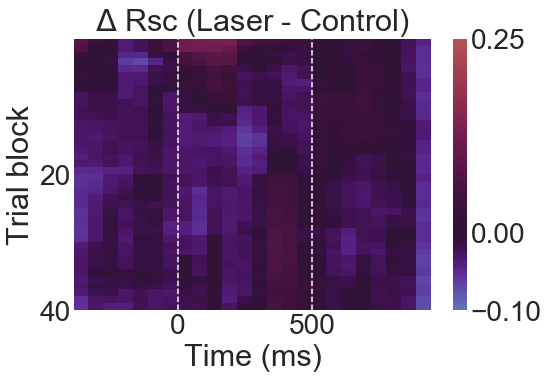

In [170]:
# Plot heatmap of corr, cov, var.
import seaborn as sns
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_freq_10.mat') # Has currents and psth
NBlockTrials = mat_contents['NBlockTrials']
mR_laserPairs_Laser = mat_contents['mR_laserPairs_Laser']
mR_laserPairs_Control = mat_contents['mR_laserPairs_Control']
mR_stderr_laserPairs_Laser = mat_contents['mR_stderr_laserPairs_Laser']
mC_laserPairs_Control = mat_contents['mC_laserPairs_Control']
mC_laserPairs_Laser = mat_contents['mC_laserPairs_Laser']
mC_stderr_laserPairs_Control = mat_contents['mC_stderr_laserPairs_Control']
mC_stderr_laserPairs_Laser = mat_contents['mC_stderr_laserPairs_Laser']
Variance_laserPairs_Control = mat_contents['Variance_laserPairs_Control']
Variance_laserPairs_Laser = mat_contents['Variance_laserPairs_Laser']
Variance_stderr_laserPairs_Control = mat_contents['Variance_stderr_laserPairs_Control']
Variance_stderr_laserPairs_Laser = mat_contents['Variance_stderr_laserPairs_Laser']

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})

ax = sns.heatmap(mR_laserPairs_Laser-np.mean(mR_laserPairs_Control, axis=0),cmap='twilight',
                norm=MidpointNormalize(midpoint=0,vmin=-0,vmax=0),
                xticklabels= (0,500),
                yticklabels= (20,40),
                vmin=-0.1,vmax=0.25,
                rasterized=True
                )
plt.xticks((7,16))
plt.yticks((20,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7, color='white',linestyle='--',linewidth=1.5)
plt.axvline(x=16, color='white',linestyle='--',linewidth=1.5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-0.1, 0, 0.25])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
cax = plt.gcf().axes[-1]
cax.tick_params(size=0)

plt.title('$\Delta$ Rsc (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block')

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corr_heatmap_scale_1_freq_10.pdf", bbox_inches="tight")

plt.show()

## Supplementary fig#3: Fix J awake and evaluate different STDPs

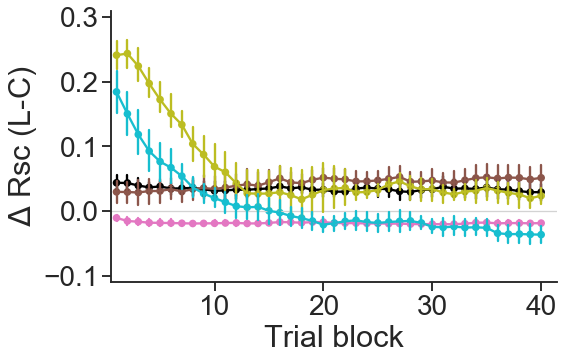

In [69]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

bin = 11

# no STDP
R_1_nostdp = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_nostdp, ci=95, color='black')
# ee STDP
R_1_eeSTDP = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_eeSTDP, ci=95, color='tab:brown')
# ie STDP
R_1_ieSTDP = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_ieSTDP, ci=95, color='tab:pink')
# ei & ii STDP
R_1_ei_iiSTDP = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_ei_iiSTDP, ci=95, color='tab:olive')
# R_1_allSTDP = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_allSTDP, ci=95, color='black')

# ei STDP
R_1 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1, ci=95, color='tab:cyan')


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'$\Delta$ Rsc (L-C)')

# plt.title('Center time bin in laser period')
plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

plt.ylim(-0.11,0.31)

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/Suppl_corr_allSTDPs.pdf", bbox_inches="tight")

plt.show()

In [63]:
## Compute the weights sliding a window over realizations and trials for a single time bin.
TrialTime = int(mat_contents['TrialTime'][0,0]/1)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))

block_slide_size = 20; # = how many trials in one block.
NBlockTrials = int(len(LaserTrials)-block_slide_size)
bin=11

# Weights for f=1, ee STDP.
Jee_Control_blocks_1 = np.zeros((len(file_names1_eeSTDP),Num_trials))
Jee_Laser_blocks_1 = np.zeros((len(file_names1_eeSTDP),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
realz=0
for file in file_names1_eeSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jee_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jee_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jee_Control[BlockTrial,window] = Jee_Control[BlockTrial,window] + np.mean(TotalJee_1_eeSTDP[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jee_Laser[BlockTrial,window] = Jee_Laser[BlockTrial,window] + np.mean(TotalJee_1_eeSTDP[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jee_Control = Jee_Control / block_slide_size
    Jee_Laser = Jee_Laser / block_slide_size
    for trial in range(Num_trials):
        Jee_Laser_blocks_1[realz,trial] = Jee_Laser[trial,bin]
        Jee_Control_blocks_1[realz,trial] = Jee_Control[trial,bin]
    
    realz+=1
    
    
# Weights for f=1, ei STDP.
Jei_Control_blocks_1 = np.zeros((len(file_names1),Num_trials))
Jei_Laser_blocks_1 = np.zeros((len(file_names1),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
realz=0
for file in file_names1:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jei_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jei_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Control[BlockTrial,window] = Jei_Control[BlockTrial,window] + np.mean(TotalJei_1[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jei_Laser[BlockTrial,window] = Jei_Laser[BlockTrial,window] + np.mean(TotalJei_1[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jei_Control = Jei_Control / block_slide_size
    Jei_Laser = Jei_Laser / block_slide_size
    for trial in range(Num_trials):
        Jei_Laser_blocks_1[realz,trial] = Jei_Laser[trial,bin]
        Jei_Control_blocks_1[realz,trial] = Jei_Control[trial,bin]
    
    realz+=1
    
# Weights for f=1, ie STDP.
Jie_Control_blocks_1 = np.zeros((len(file_names1_ieSTDP),Num_trials))
Jie_Laser_blocks_1 = np.zeros((len(file_names1_ieSTDP),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
realz=0
for file in file_names1_ieSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jie_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jie_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jie_Control[BlockTrial,window] = Jie_Control[BlockTrial,window] + np.mean(TotalJie_1_ieSTDP[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jie_Laser[BlockTrial,window] = Jie_Laser[BlockTrial,window] + np.mean(TotalJie_1_ieSTDP[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jie_Control = Jie_Control / block_slide_size
    Jie_Laser = Jie_Laser / block_slide_size
    for trial in range(Num_trials):
        Jie_Laser_blocks_1[realz,trial] = Jie_Laser[trial,bin]
        Jie_Control_blocks_1[realz,trial] = Jie_Control[trial,bin]
    
    realz+=1
    
# Weights for f=1, ei+ii STDP.
Jii_Control_blocks_1 = np.zeros((len(file_names1_ei_iiSTDP),Num_trials))
Jii_Laser_blocks_1 = np.zeros((len(file_names1_ei_iiSTDP),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/10)
sliding_window = int(mat_contents['sliding_window'][0,0]/10)
TrialTime = int(mat_contents['TrialTime'][0,0]/10)
Number_of_points_J = int((TrialTime/winsize-1)*(winsize/sliding_window))
realz=0
for file in file_names1_ei_iiSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Jii_Control = np.zeros((NBlockTrials,Number_of_points_J))
    Jii_Laser = np.zeros((NBlockTrials,Number_of_points_J))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jii_Control[BlockTrial,window] = Jii_Control[BlockTrial,window] + np.mean(TotalJii_1_ei_iiSTDP[realz,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_J):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Jii_Laser[BlockTrial,window] = Jii_Laser[BlockTrial,window] + np.mean(TotalJii_1_ei_iiSTDP[realz,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Jii_Control = Jii_Control / block_slide_size
    Jii_Laser = Jii_Laser / block_slide_size
    for trial in range(Num_trials):
        Jii_Laser_blocks_1[realz,trial] = Jii_Laser[trial,bin]
        Jii_Control_blocks_1[realz,trial] = Jii_Control[trial,bin]
    
    realz+=1


In [28]:
TrialTime


1400

In [61]:
## Compute the Inhibitory current sliding a window over realizations and trials for a single time bin.
winsize = int(mat_contents['winsize'][0,0]/1)
sliding_window = int(mat_contents['sliding_window'][0,0]/1)
TrialTime = mat_contents['TrialTime'][0,0]
LaserTrials = mat_contents['LaserTrials'][0]
ControlTrials = mat_contents['ControlTrials'][:,0]
Total_number_trials = mat_contents['Total_number_trials'][0,0]

Number_of_points_Ii = int((TrialTime/winsize-1)*(winsize/sliding_window))

block_slide_size = 20; # = how many trials in one block.
NBlockTrials = int(len(LaserTrials)-block_slide_size)
bin=11

# Ii for f=1, ee STDP.
Ii_Control_blocks_ee = np.zeros((len(file_names1_eeSTDP),Num_trials))
Ii_Laser_blocks_ee = np.zeros((len(file_names1_eeSTDP),Num_trials))
realz=0
for file in file_names1_eeSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_ee[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_ee[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1
    
# Ii for f=1, ei STDP, freq=35Hz.
Ii_Control_blocks_ei = np.zeros((len(file_names1),Num_trials))
Ii_Laser_blocks_ei = np.zeros((len(file_names1),Num_trials))
winsize = int(mat_contents['winsize'][0,0]/1)
sliding_window = int(mat_contents['sliding_window'][0,0]/1)
Number_of_points_Ii = int((TrialTime/winsize-1)*(winsize/sliding_window))
TrialTime = int(mat_contents['TrialTime'][0,0]/1)
realz=0
for file in file_names1:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_ei[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_ei[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1

# Ii for f=1, ie STDP.
Ii_Control_blocks_ie = np.zeros((len(file_names1_ieSTDP),Num_trials))
Ii_Laser_blocks_ie = np.zeros((len(file_names1_ieSTDP),Num_trials))
realz=0
for file in file_names1_ieSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_ie[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_ie[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1
    
# Ii for f=1, ii STDP.
Ii_Control_blocks_ii = np.zeros((len(file_names1_ei_iiSTDP),Num_trials))
Ii_Laser_blocks_ii = np.zeros((len(file_names1_ei_iiSTDP),Num_trials))
realz=0
for file in file_names1_ei_iiSTDP:
    #Load data for each one individually.
    mat_contents=sio.loadmat(file)
    Ii_Control = np.zeros((NBlockTrials,Number_of_points_Ii))
    Ii_Laser = np.zeros((NBlockTrials,Number_of_points_Ii))
    for BlockTrial in range(NBlockTrials):
        ControlTrialsUsed = ControlTrials[BlockTrial:block_slide_size+BlockTrial];
        LaserTrialsUsed = LaserTrials[BlockTrial:block_slide_size+BlockTrial];
        for i in range(Total_number_trials):
            if i+1 in ControlTrialsUsed: # Count spikes only if i is a control trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Control[BlockTrial,window] = Ii_Control[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
            elif i+1 in LaserTrialsUsed:  # if laser trial.
                for window in range(Number_of_points_Ii):
                    T1=TrialTime*(i) + sliding_window*(window); # Burn-in period of 200 ms
                    T2=T1+winsize;   # Compute covariances until end of simulation

                    Ii_Laser[BlockTrial,window] = Ii_Laser[BlockTrial,window] + np.mean(mat_contents['IiCurrent_stim'][0,T1:T2+1])
    # We summed spike counts over trials, now we divide by over how many trials we added them.
    Ii_Control = Ii_Control / block_slide_size
    Ii_Laser = Ii_Laser / block_slide_size
    for trial in range(Num_trials):
        Ii_Laser_blocks_ii[realz,trial] = Ii_Laser[trial,bin]
        Ii_Control_blocks_ii[realz,trial] = Ii_Control[trial,bin]
    
    realz+=1

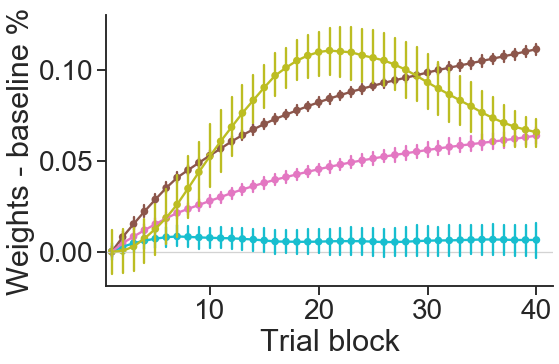

In [67]:
# Plot weight against blocks, averaged at each block for the center laser time bin.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

sns.pointplot( kind='point',data=(Jee_Laser_blocks_1-np.mean(Jee_Laser_blocks_1[:,0]))/np.mean(Jee_Laser_blocks_1[:,0]), ci=95, color='tab:brown')
sns.pointplot( kind='point',data=(Jei_Laser_blocks_1-np.mean(Jei_Laser_blocks_1[:,0]))/np.mean(Jei_Laser_blocks_1[:,0]), ci=95, color='tab:cyan')
sns.pointplot( kind='point',data=(Jie_Laser_blocks_1-np.mean(Jie_Laser_blocks_1[:,0]))/np.mean(Jie_Laser_blocks_1[:,0]), ci=95, color='tab:pink')
sns.pointplot( kind='point',data=-(Jii_Laser_blocks_1-np.mean(Jii_Laser_blocks_1[:,0]))/np.mean(Jii_Laser_blocks_1[:,0]), ci=95, color='tab:olive')


# plt.plot(np.transpose(Jei_Laser)[bin]-np.transpose(Jei_Laser)[bin][0])


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'Weights - baseline %')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(81,84)

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/weights_all_STDP.pdf", bbox_inches="tight")

plt.show()

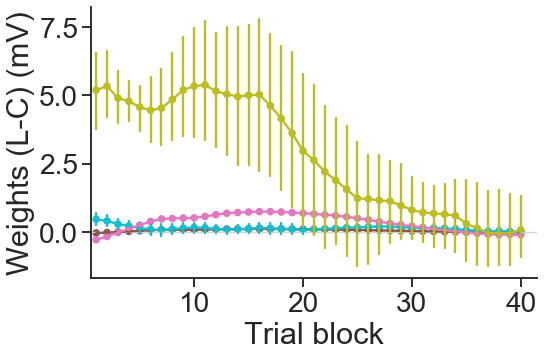

In [68]:
# Plot weight against blocks, averaged at each block for the center laser time bin.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

# sns.pointplot( kind='point',data=(Jei_Laser_blocks_04-np.mean(Jei_Control_blocks_04[:,0])), ci=95, color='darkgoldenrod')
# sns.pointplot( kind='point',data=(Jei_Laser_blocks_05-np.mean(Jei_Control_blocks_05[:,0])), ci=95, color='black')
# sns.pointplot( kind='point',data=(Jei_Laser_blocks_1-np.mean(Jei_Control_blocks_1[:,0])), ci=95, color='darkmagenta')


sns.pointplot( kind='point',data=(Jee_Laser_blocks_1-Jee_Control_blocks_1), ci=95, color='tab:brown')
sns.pointplot( kind='point',data=-(Jei_Laser_blocks_1-Jei_Control_blocks_1), ci=95, color='tab:cyan')
sns.pointplot( kind='point',data=(Jie_Laser_blocks_1-Jie_Control_blocks_1), ci=95, color='tab:pink')
sns.pointplot( kind='point',data=-(Jii_Laser_blocks_1-Jii_Control_blocks_1), ci=95, color='tab:olive')




# plt.plot(np.transpose(Jei_Laser)[bin]-np.transpose(Jei_Laser)[bin][0])


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'Weights (L-C) (mV)')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(81,84)

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/weights_all_STDP_laserminuscontrol.pdf", bbox_inches="tight")


plt.show()

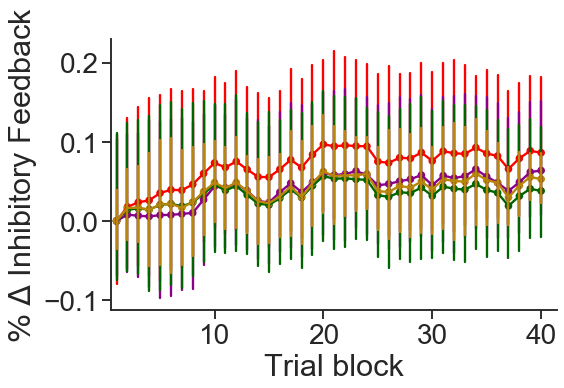

In [9]:
# Plot weight against blocks, averaged at each block, ofr the center laser time bin.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# plt.axhline(y=0, color="lightgray")

bin = 11

# R_02 = sns.pointplot( kind='point',data=mR_laserPairs_Diff_02, ci=95, color='green')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_ee-np.mean(Ii_Laser_blocks_ee[:,0]))/np.mean(Ii_Laser_blocks_ee[:,0]), ci=95, color='red')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_ei-np.mean(Ii_Laser_blocks_ei[:,0]))/np.mean(Ii_Laser_blocks_ei[:,0]), ci=95, color='darkmagenta')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_ie-np.mean(Ii_Laser_blocks_ie[:,0]))/np.mean(Ii_Laser_blocks_ie[:,0]), ci=95, color='darkgreen')
sns.pointplot( kind='point',data=(Ii_Laser_blocks_ii-np.mean(Ii_Laser_blocks_ii[:,0]))/np.mean(Ii_Laser_blocks_ii[:,0]), ci=95, color='darkgoldenrod')



# sns.pointplot( kind='point',data=Ii_Laser_blocks_04, ci=95, color='darkgoldenrod')
# sns.pointplot( kind='point',data=Ii_Laser_blocks_05, ci=95, color='black')
# sns.pointplot( kind='point',data=Ii_Laser_blocks_1, ci=95, color='darkmagenta')



# plt.plot(np.transpose(Jei_Laser)[bin]-np.transpose(Jei_Laser)[bin][0])


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'$\%$ $\Delta$ Inhibitory Feedback')

# # plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(81,84)

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/Iicurrent_all_STDP.pdf", bbox_inches="tight")

plt.show()

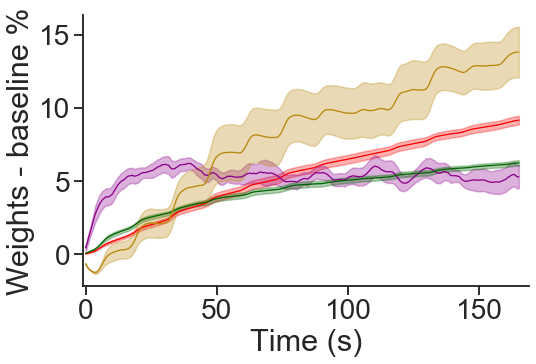

In [183]:
## Plot of ei weights for varying scaling factor 'f'.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# mean_Jei = np.mean(TotalJei,axis=0)
# stderr_Jei = np.std(TotalJei,axis=0)/np.sqrt(Num_realizations)

mov_avg = 300

Jee_1=np.zeros((len(file_names1_eeSTDP), 16800-mov_avg))
Jei_1=np.zeros((len(file_names1), 16800-mov_avg))
Jie_1=np.zeros((len(file_names1_ieSTDP), 16800-mov_avg))
Jii_1=np.zeros((len(file_names1_ei_iiSTDP), 16800-mov_avg))


for realz in range(len(file_names1_eeSTDP)):
    for i in range(16800-mov_avg):
        Jee_1[realz,i] = 100*(np.mean(TotalJee_1_eeSTDP[realz,i:i+mov_avg]) - TotalJee_1_eeSTDP[realz,0]) / TotalJee_1_eeSTDP[realz,0]
for realz in range(len(file_names1)):
    for i in range(16800-mov_avg):
        Jei_1[realz,i] = 100*(np.mean(TotalJei_1[realz,i:i+mov_avg]) - TotalJei_1[realz,0]) / TotalJei_1[realz,0]
for realz in range(len(file_names1_ieSTDP)):
    for i in range(16800-mov_avg):
        Jie_1[realz,i] = 100*(np.mean(TotalJie_1_ieSTDP[realz,i:i+mov_avg]) - TotalJie_1_ieSTDP[realz,0]) / TotalJie_1_ieSTDP[realz,0]
for realz in range(len(file_names1_ei_iiSTDP)):
    for i in range(16800-mov_avg):
        Jii_1[realz,i] = 100*(np.mean(TotalJii_1_ei_iiSTDP[realz,i:i+mov_avg]) - TotalJii_1_ei_iiSTDP[realz,0] ) / TotalJii_1_ei_iiSTDP[realz,0]

mean_1 = np.mean(Jee_1,axis=0)
std_1 = np.std(Jee_1,axis=0)/np.sqrt(len(file_names1_eeSTDP))
mean_2 = np.mean(Jei_1,axis=0)
std_2 = np.std(Jei_1,axis=0)/np.sqrt(len(file_names1))
mean_3 = np.mean(Jie_1,axis=0)
std_3 = np.std(Jie_1,axis=0)/np.sqrt(len(file_names1_ieSTDP))
mean_4 = np.mean(Jii_1,axis=0)
std_4 = np.std(Jii_1,axis=0)/np.sqrt(len(file_names1_ei_iiSTDP))


plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_1,color = 'red',label='EE')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_1 - std_1, 
                 mean_1 + std_1,
                 color='red', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_2,color = 'darkmagenta', label='EI')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_2 - std_2, 
                 mean_2 + std_2,
                 color='darkmagenta', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_3,color = 'darkgreen', label='IE')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_3 - std_3, 
                 mean_3 + std_3,
                 color='darkgreen', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_4,color = 'darkgoldenrod', label='II')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_4 - std_4, 
                 mean_4 + std_4,
                 color='darkgoldenrod', alpha=0.3)

# plt.plot(TotalJie_1_ieSTDP[7])

# plt.legend(fontsize=15)

sns.despine()

plt.xlim((-1,169))
# plt.yticks((50,70,90))
# plt.ylim((45,95))

plt.xlabel('Time (s)')
plt.ylabel('Weights - baseline %')

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/weights_all_stdp.pdf", bbox_inches="tight")

plt.show()

In [186]:
# Plot inhibitory current for increasing f.

for i in range(4):
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_eeSTDP.mat') # Has currents and psth
    Ii_eeSTDP = mat_contents['IiCurrent'][0,::10]
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1.mat') # Has currents and psth
    Ii_eiSTDP = mat_contents['IiCurrent'][0,::10]
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_ieSTDP.mat') # Has currents and psth
    Ii_ieSTDP = mat_contents['IiCurrent'][0,::10]
    mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_ei_iiSTDP.mat') # Has currents and psth
    Ii_iiSTDP = mat_contents['IiCurrent'][0,::10]

# Start figure.
fig=plt.figure(figsize=(8,5))

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.05})

time_axx =np.linspace(0,len(Ii_04),int(len(Ii_04)))

plt.plot(time_axx/100,gaussian_filter(Ii_eeSTDP,sigma=80),linewidth=2,color='red')
plt.plot(time_axx/100,gaussian_filter(Ii_eiSTDP,sigma=80),linewidth=2,color='darkmagenta')
plt.plot(time_axx/100,gaussian_filter(Ii_ieSTDP,sigma=80),linewidth=2,color='darkgreen')
plt.plot(time_axx/100,gaussian_filter(Ii_iiSTDP,sigma=80),linewidth=2,color='darkgoldenrod')


plt.xlabel('Time')
plt.ylabel('Inhibitory current')

# plt.title('Control Trials')

# plt.xticks((-0.5,168.5))
plt.xlim((-0.5,168.5))
# plt.ylim((-5,45))
# plt.yticks((0,20,40))

sns.despine()

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
# plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
#                  color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/Iicurrent_allSTDP.pdf", bbox_inches="tight")


plt.show()

KeyError: 'IiCurrent'

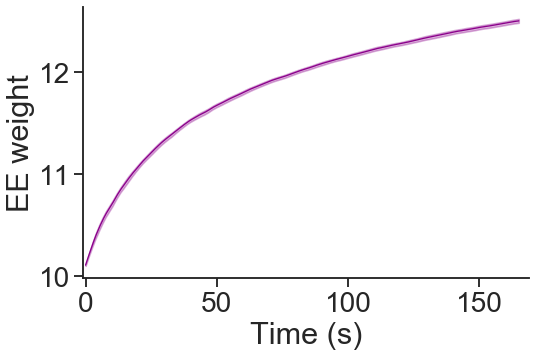

In [747]:
## Plot of weights downscaling.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# mean_Jei = np.mean(TotalJei,axis=0)
# stderr_Jei = np.std(TotalJei,axis=0)/np.sqrt(Num_realizations)

mov_avg = 300

Jee_1=np.zeros((len(file_names1_eeSTDP), 16800-mov_avg))


for realz in range(len(file_names1_eeSTDP)):
    for i in range(16800-mov_avg):
        Jee_1[realz,i] = np.mean(TotalJee_1_eeSTDP[realz,i:i+mov_avg])
    
mean_1 = np.mean(Jee_1,axis=0)
std_1 = np.std(Jee_1,axis=0)/np.sqrt(len(file_names1_eeSTDP))

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_1,color = 'darkmagenta')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_1 - std_1, 
                 mean_1 + std_1,
                 color='darkmagenta', alpha=0.3)



sns.despine()

plt.xlim((-1,169))
# plt.yticks((50,70,90))
# plt.ylim((45,95))

plt.xlabel('Time (s)')
plt.ylabel('EE weight')

# fig.savefig("./PlotsForPaperWithAriana/weights_all_scales.pdf", bbox_inches="tight")

plt.show()

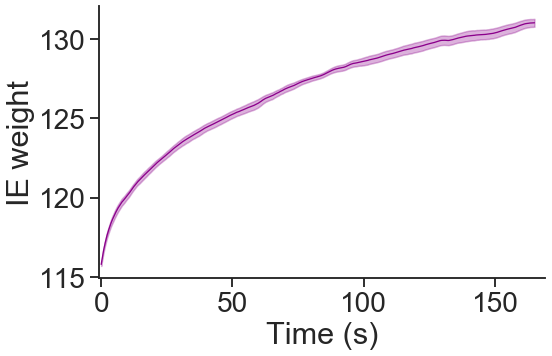

In [778]:
## Plot of weights downscaling.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# mean_Jei = np.mean(TotalJei,axis=0)
# stderr_Jei = np.std(TotalJei,axis=0)/np.sqrt(Num_realizations)

mov_avg = 300

Jie_1=np.zeros((len(file_names1_ieSTDP), 16800-mov_avg))


for realz in range(len(file_names1_ieSTDP)):
    for i in range(16800-mov_avg):
        Jie_1[realz,i] = np.mean(TotalJie_1_ieSTDP[realz,i:i+mov_avg])
    
mean_1 = np.mean(Jie_1,axis=0)
std_1 = np.std(Jie_1,axis=0)/np.sqrt(len(file_names1_ieSTDP))

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_1,color = 'darkmagenta')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_1 - std_1, 
                 mean_1 + std_1,
                 color='darkmagenta', alpha=0.3)

# plt.plot(TotalJie_1_ieSTDP[7])


sns.despine()

plt.xlim((-1,169))
# plt.yticks((50,70,90))
# plt.ylim((45,95))

plt.xlabel('Time (s)')
plt.ylabel('IE weight')

# fig.savefig("./PlotsForPaperWithAriana/weights_all_scales.pdf", bbox_inches="tight")

plt.show()

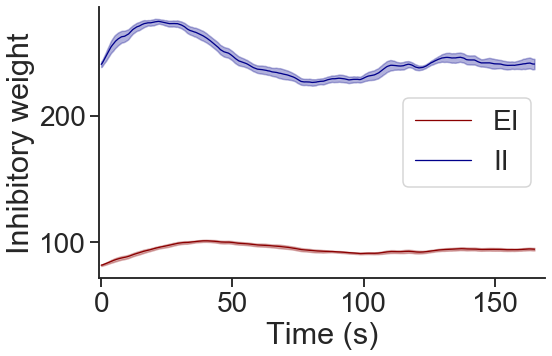

In [771]:
## Plot of weights downscaling.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# mean_Jei = np.mean(TotalJei,axis=0)
# stderr_Jei = np.std(TotalJei,axis=0)/np.sqrt(Num_realizations)

mov_avg = 300

Jei_1=np.zeros((len(file_names1_ei_iiSTDP), 16800-mov_avg))
Jii_1=np.zeros((len(file_names1_ei_iiSTDP), 16800-mov_avg))


for realz in range(len(file_names1_ei_iiSTDP)):
    for i in range(16800-mov_avg):
        Jei_1[realz,i] = np.mean(TotalJei_1_ei_iiSTDP[realz,i:i+mov_avg])
        Jii_1[realz,i] = np.mean(TotalJii_1_ei_iiSTDP[realz,i:i+mov_avg])
    
mean_1 = np.mean(Jei_1,axis=0)
std_1 = np.std(Jei_1,axis=0)/np.sqrt(len(file_names1_ei_iiSTDP))
mean_2 = np.mean(Jii_1,axis=0)
std_2 = np.std(Jii_1,axis=0)/np.sqrt(len(file_names1_ei_iiSTDP))


plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_1,color = 'darkred',label='EI')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_1 - std_1, 
                 mean_1 + std_1,
                 color='darkred', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_2,color = 'darkblue', label='II')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_2 - std_2, 
                 mean_2 + std_2,
                 color='darkblue', alpha=0.3)

# plt.plot(TotalJie_1_ieSTDP[7])

plt.legend()

sns.despine()

plt.xlim((-1,169))
# plt.yticks((50,70,90))
# plt.ylim((45,95))

plt.xlabel('Time (s)')
plt.ylabel('Inhibitory weight')

# fig.savefig("./PlotsForPaperWithAriana/weights_all_scales.pdf", bbox_inches="tight")

plt.show()

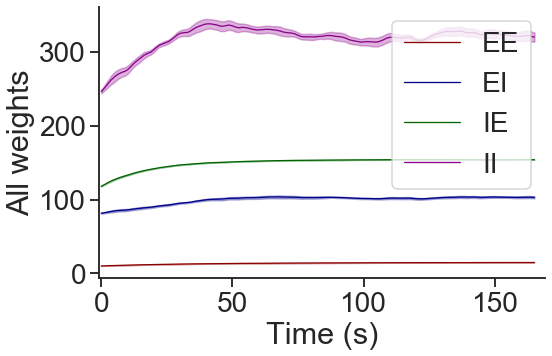

In [788]:
## Plot of all weights all STDPs case.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# mean_Jei = np.mean(TotalJei,axis=0)
# stderr_Jei = np.std(TotalJei,axis=0)/np.sqrt(Num_realizations)

mov_avg = 300

Jee_1=np.zeros((len(file_names1_allSTDP), 16800-mov_avg))
Jei_1=np.zeros((len(file_names1_allSTDP), 16800-mov_avg))
Jie_1=np.zeros((len(file_names1_allSTDP), 16800-mov_avg))
Jii_1=np.zeros((len(file_names1_allSTDP), 16800-mov_avg))


for realz in range(len(file_names1_allSTDP)):
    for i in range(16800-mov_avg):
        Jee_1[realz,i] = np.mean(TotalJee_1_allSTDP[realz,i:i+mov_avg])
        Jei_1[realz,i] = np.mean(TotalJei_1_allSTDP[realz,i:i+mov_avg])
        Jie_1[realz,i] = np.mean(TotalJie_1_allSTDP[realz,i:i+mov_avg])
        Jii_1[realz,i] = np.mean(TotalJii_1_allSTDP[realz,i:i+mov_avg])
    
mean_1 = np.mean(Jee_1,axis=0)
std_1 = np.std(Jee_1,axis=0)/np.sqrt(len(file_names1_allSTDP))
mean_2 = np.mean(Jei_1,axis=0)
std_2 = np.std(Jei_1,axis=0)/np.sqrt(len(file_names1_allSTDP))
mean_3 = np.mean(Jie_1,axis=0)
std_3 = np.std(Jie_1,axis=0)/np.sqrt(len(file_names1_allSTDP))
mean_4 = np.mean(Jii_1,axis=0)
std_4 = np.std(Jii_1,axis=0)/np.sqrt(len(file_names1_allSTDP))


plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_1,color = 'darkred',label='EE')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_1 - std_1, 
                 mean_1 + std_1,
                 color='darkred', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_2,color = 'darkblue', label='EI')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_2 - std_2, 
                 mean_2 + std_2,
                 color='darkblue', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_3,color = 'darkgreen', label='IE')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_3 - std_3, 
                 mean_3 + std_3,
                 color='darkgreen', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_4,color = 'darkmagenta', label='II')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_4 - std_4, 
                 mean_4 + std_4,
                 color='darkmagenta', alpha=0.3)

# plt.plot(TotalJie_1_ieSTDP[7])

plt.legend()

sns.despine()

plt.xlim((-1,169))
# plt.yticks((50,70,90))
# plt.ylim((45,95))

plt.xlabel('Time (s)')
plt.ylabel('All weights')

# fig.savefig("./PlotsForPaperWithAriana/weights_all_scales.pdf", bbox_inches="tight")

plt.show()

## Supplementary fig: No STDPs - how does initial J change correlations?

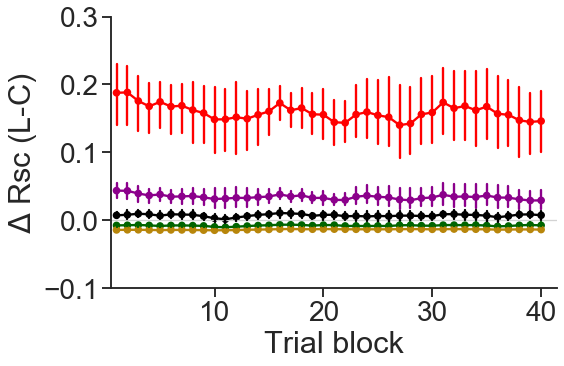

In [815]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

bin = 11

R_04_nostdp = sns.pointplot( kind='point',data=mR_laserPairs_Diff_04_nostdp, ci=95, color='red')
R_1_nostdp = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_nostdp, ci=95, color='darkmagenta')
R_13_nostdp = sns.pointplot( kind='point', data=mR_laserPairs_Diff_13_nostdp, ci=95, color='black')
R_16_nostdp = sns.pointplot( kind='point', data=mR_laserPairs_Diff_16_nostdp, ci=95, color='darkgreen')
R_25_nostdp = sns.pointplot( kind='point', data=mR_laserPairs_Diff_25_nostdp, ci=95, color='darkgoldenrod')


# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'$\Delta$ Rsc (L-C)')

# plt.title('Center time bin in laser period')
plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(-0.05,0.05)

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Suppl_corr_scale_factor_blocks_noSTDP.pdf", bbox_inches="tight")

plt.show()


# Supplementary figure: N=5000, different initial jei's

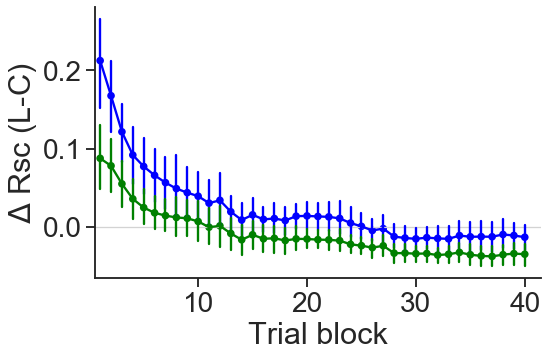

In [806]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

plt.axhline(y=0, color="lightgray")

bin = 11

R_1_N5000 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_N5000, ci=95, color='blue')
# R_1_N5000_jei_200 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_N5000_jei_200, ci=95, color='black')
# R_1_N5000_jei_300 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_N5000_jei_300, ci=95, color='red')
R_1_N5000_jei_500 = sns.pointplot( kind='point', data=mR_laserPairs_Diff_1_N5000_jei_500, ci=95, color='green')

# leg = plt.legend([ "scale=0.4","scale=0.6","scale=1"], loc='upper right',fontsize=15,frameon='none')
# leg.get_frame().set_linewidth(0.0)

plt.xlabel(r'Trial block')
plt.ylabel(r'$\Delta$ Rsc (L-C)')

# plt.title('Center time bin in laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))

ax.set_xticklabels([10,20,30,40])
plt.xticks((9,19,29,39))
plt.xlim((-0.5,40.5))

# plt.ylim(-0.05,0.05)

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Corr_scale_factor_blocks.pdf", bbox_inches="tight")

plt.show()


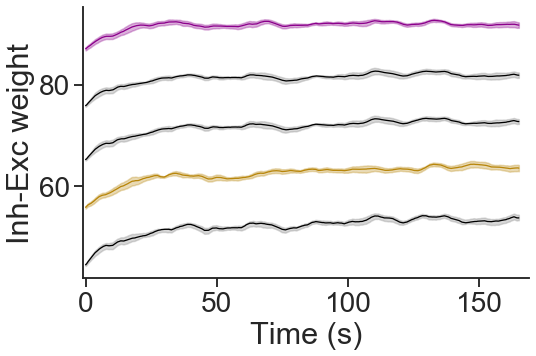

In [749]:
## Plot of weights downscaling.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})

# mean_Jei = np.mean(TotalJei,axis=0)
# stderr_Jei = np.std(TotalJei,axis=0)/np.sqrt(Num_realizations)

mov_avg = 300

Jei_02=np.zeros((len(file_names02), 16800-mov_avg))
Jei_04=np.zeros((len(file_names04), 16800-mov_avg))
Jei_06=np.zeros((len(file_names06), 16800-mov_avg))
Jei_08=np.zeros((len(file_names08), 16800-mov_avg))
Jei_1=np.zeros((len(file_names1), 16800-mov_avg))

for realz in range(len(file_names02)):
    for i in range(16800-mov_avg):
        Jei_02[realz,i] = np.mean(TotalJei_02[realz,i:i+mov_avg])
for realz in range(len(file_names04)):
    for i in range(16800-mov_avg):
        Jei_04[realz,i] = np.mean(TotalJei_04[realz,i:i+mov_avg])
for realz in range(len(file_names06)):
    for i in range(16800-mov_avg):
        Jei_06[realz,i] = np.mean(TotalJei_06[realz,i:i+mov_avg])
for realz in range(len(file_names08)):
    for i in range(16800-mov_avg):
        Jei_08[realz,i] = np.mean(TotalJei_08[realz,i:i+mov_avg])
for realz in range(len(file_names1)):
    for i in range(16800-mov_avg):
        Jei_1[realz,i] = np.mean(TotalJei_1[realz,i:i+mov_avg])
    
mean_02 = np.mean(Jei_02,axis=0)
std_02 = np.std(Jei_02,axis=0)/np.sqrt(len(file_names02))
mean_04 = np.mean(Jei_04,axis=0)
std_04 = np.std(Jei_04,axis=0)/np.sqrt(len(file_names04))
mean_06 = np.mean(Jei_06,axis=0)
std_06 = np.std(Jei_06,axis=0)/np.sqrt(len(file_names06))
mean_08 = np.mean(Jei_08,axis=0)
std_08 = np.std(Jei_08,axis=0)/np.sqrt(len(file_names08))
mean_1 = np.mean(Jei_1,axis=0)
std_1 = np.std(Jei_1,axis=0)/np.sqrt(len(file_names1_N5000_jei_500))

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_02,color = 'black')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_02 - std_02, 
                 mean_02 + std_04,color='gray', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_04,color = 'darkgoldenrod')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_04 - std_04, 
                 mean_04 + std_04,
                 color='darkgoldenrod', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_06,color = 'black')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_06 - std_06, 
                 mean_06 + std_06,
                 color='gray', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_08,color = 'black')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_08 - std_08, 
                 mean_08 + std_08,
                 color='gray', alpha=0.3)

plt.plot(np.arange(0,16800-mov_avg,1)/100, mean_1,color = 'darkmagenta')

plt.fill_between(np.arange(0,16800-mov_avg,1)/100, mean_1 - std_1, 
                 mean_1 + std_1,
                 color='darkmagenta', alpha=0.3)



sns.despine()

plt.xlim((-1,169))
# plt.yticks((50,70,90))
# plt.ylim((45,95))

plt.xlabel('Time (s)')
plt.ylabel('EI weight')

# fig.savefig("./PlotsForPaperWithAriana/weights_all_scales.pdf", bbox_inches="tight")

plt.show()

# Plots of individual realizations

In [114]:
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_90_scale_0.4.mat') #rest
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_0.6.mat') 
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.mat') #awake
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_nostdp.mat')
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_2_scale_1_N5000_jei-500.mat')
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_1_scale_1_ieSTDP.mat')
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_allSTDP.mat')
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_2_scale_1.5.mat') # Pretty good. 
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_8_scale_1.mat') # Has currents and psth
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_9_scale_0.4.mat') # Has currents and psth






TotalJee = mat_contents['TotalJee']
TotalJei = -mat_contents['TotalJei']
TotalJie = mat_contents['TotalJie']
TotalJii = -mat_contents['TotalJii']

# Jee_std_err = mat_contents['JRec_ee_std']
# Jei_std_err = mat_contents['JRec_ei_std']
# Jie_std_err = mat_contents['JRec_ie_std']
# Jii_std_err = mat_contents['JRec_ii_std']
timeRecord = np.arange(0,len(TotalJee[0]),step=1) /10000

NBlockTrials = mat_contents['NBlockTrials']
mR_laserPairs_Laser = mat_contents['mR_laserPairs_Laser']
mR_laserPairs_Control = mat_contents['mR_laserPairs_Control']
mR_stderr_laserPairs_Laser = mat_contents['mR_stderr_laserPairs_Laser']
Total_number_trials = np.float(mat_contents['Total_number_trials'][0,0])
TrialTime = np.float(mat_contents['TrialTime'][0,0])
dt=np.float(mat_contents['dt'][0][0])
ControlTrials = mat_contents['ControlTrials']
LaserTrials = mat_contents['LaserTrials']
FR_laserPairs_Laser = mat_contents['FR_laserPairs_Laser']
FR_laserPairs_Control = mat_contents['FR_laserPairs_Control']

PSTH_laserPairs_Laser = 1000*mat_contents['PSTH_laserPairs_Laser']
PSTH_laserPairs_Control = 1000*mat_contents['PSTH_laserPairs_Control']
Ii = mat_contents['IiCurrent']

# Smooth the psths
for i in range(len(PSTH_laserPairs_Laser[:,0])):
    PSTH_laserPairs_Laser[i,:] = gaussian_filter(PSTH_laserPairs_Laser[i,:],sigma=15)
    PSTH_laserPairs_Control[i,:] = gaussian_filter(PSTH_laserPairs_Control[i,:],sigma=15)



In [115]:
# With currents and psth's.

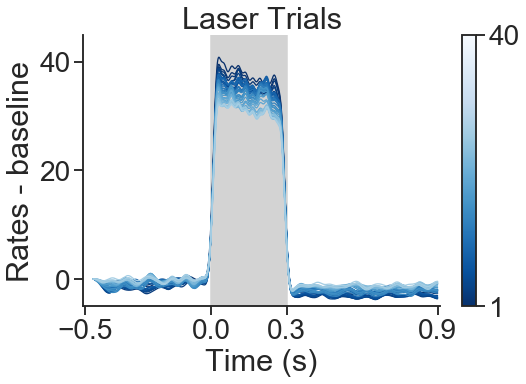

In [116]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.3})


n = len(PSTH_laserPairs_Laser[:,0])
# Which bin should we take as first one?
bin = 0
a = PSTH_laserPairs_Laser[:,bin].reshape(np.int(NBlockTrials),1)
PSTH_lasercorrs_firstbin = np.tile(a, len(PSTH_laserPairs_Laser[0]))

color = cm.Blues_r(np.linspace(0,.65,n))
X = np.linspace(-0.47,0.9,1399) # We lose a one 30ms time bin.
Z = PSTH_laserPairs_Laser - PSTH_lasercorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rates - baseline')

plt.title('Laser Trials')

plt.xticks((-0.5,0,0.3,0.9))
plt.xlim((-.51,0.91))
plt.ylim((-5,45))
plt.yticks((0,20,40))

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=80)
cmap = mpl.cm.ScalarMappable( cmap=mpl.cm.Blues_r)
cmap.set_clim( vmin=1, vmax=40)
cmap.set_array([])

fig.colorbar(cmap,ticks = [1,40])

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
                 color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/deltaCorrLaser_awake.pdf", bbox_inches="tight")


plt.show()

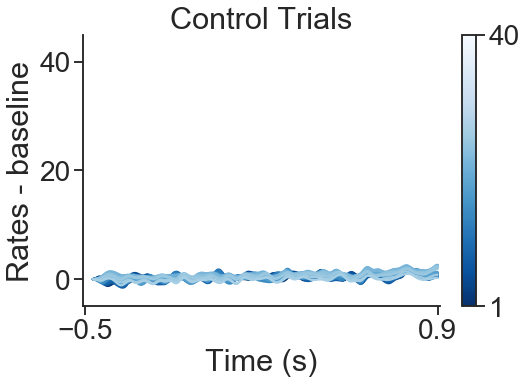

In [90]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":2.3})

n = len(PSTH_laserPairs_Control[:,0])
# Which bin should we take as first one?
bin = 0
a = PSTH_laserPairs_Control[:,bin].reshape(np.int(NBlockTrials),1)
PSTH_Controlcorrs_firstbin = np.tile(a, len(PSTH_laserPairs_Control[0]))

color = cm.Blues_r(np.linspace(0,.65,n))
X = np.linspace(-0.47,0.9,1399) # We lose a one 30ms time bin.
Z = PSTH_laserPairs_Control - PSTH_Controlcorrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rates - baseline')

plt.title('Control Trials')

plt.xticks((-0.5,0.9))
plt.xlim((-.51,0.91))
plt.ylim((-5,45))
plt.yticks((0,20,40))

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=80)
cmap = mpl.cm.ScalarMappable( cmap=mpl.cm.Blues_r)
cmap.set_clim( vmin=1, vmax=40)
cmap.set_array([])

fig.colorbar(cmap,ticks = [1,40])

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
# plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
#                  color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/deltaCorrLaser_awake.pdf", bbox_inches="tight")


plt.show()

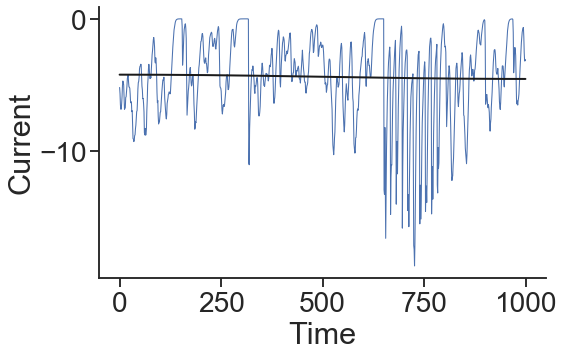

In [111]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 
from scipy.ndimage import gaussian_filter

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":1.05})

time_axx =np.linspace(0,len(Ii[0]),int(len(Ii[0])))

plt.plot(Ii[0,1000:2000])
plt.plot(gaussian_filter(Ii[0,1000:2000],sigma=500),linewidth=2,color='k')

plt.xlabel('Time')
plt.ylabel('Current')

# plt.title('Control Trials')

# plt.xticks((-0.5,0.9))
# plt.xlim((-.51,0.91))
# plt.ylim((-5,45))
# plt.yticks((0,20,40))

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=80)
# cmap = mpl.cm.ScalarMappable( cmap=mpl.cm.Blues_r)
# cmap.set_clim( vmin=1, vmax=40)
# cmap.set_array([])

# fig.colorbar(cmap,ticks = [1,40])

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
# plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
#                  color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/deltaCorrLaser_awake.pdf", bbox_inches="tight")


plt.show()

In [100]:
# Compare strength of inhibitory feedback in rest vs awake

In [93]:
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_8_scale_1.mat') # Has currents and psth
Ii_awake = mat_contents['IiCurrent']

mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_9_scale_0.4.mat') # Has currents and psth
Ii_rest = mat_contents['IiCurrent']


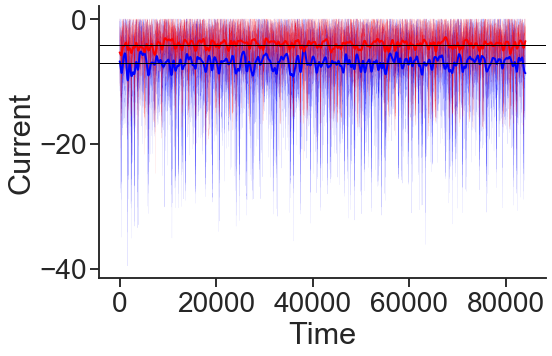

In [107]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 
from scipy.ndimage import gaussian_filter

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":.05})

time_axx =np.linspace(0,len(Ii[0]),int(len(Ii[0])))

plt.plot(Ii_awake[0,:],color='blue')
plt.plot(Ii_rest[0,:],color='red')

plt.plot(time_axx,gaussian_filter(Ii_awake[0,::1],sigma=200),linewidth=2,color='blue')
plt.plot(time_axx,gaussian_filter(Ii_rest[0,::1],sigma=200),linewidth=2,color='red')

plt.axhline(np.mean(Ii_rest), color='black', linewidth=1)
plt.axhline(np.mean(Ii_awake), color='black', linewidth=1)

plt.xlabel('Time')
plt.ylabel('Current')

# plt.title('Control Trials')

# plt.xticks((-0.5,0.9))
# plt.xlim((-.51,0.91))
# plt.ylim((-5,45))
# plt.yticks((0,20,40))

sns.despine()

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
# plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
#                  color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/deltaCorrLaser_awake.pdf", bbox_inches="tight")


plt.show()

In [101]:
gaussian_filter(Ii_awake[0,::1],sigma=50)[0]

-4.6827785188870505

In [102]:
gaussian_filter(Ii_awake[0,::1],sigma=50)[-1]

-7.763366233109863

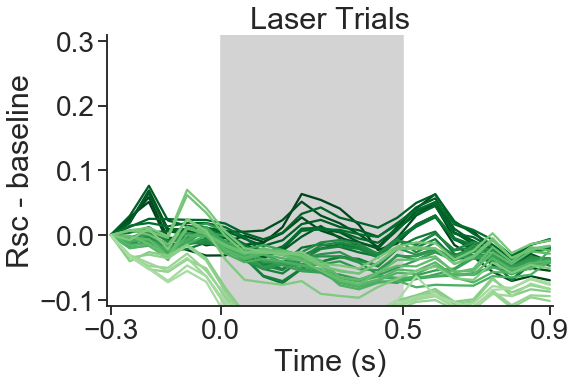

In [868]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":2.3})

n = len(mR_laserPairs_Laser[:,0])
# Which bin should we take as first one?
bin = 0
a = mR_laserPairs_Laser[:,bin].reshape(np.int(NBlockTrials),1)
Laser_corrs_firstbin = np.tile(a, len(mR_laserPairs_Laser[0]))

color = cm.Greens(np.linspace(1,0.35,n))
X = np.linspace(-0.3,0.9,24)
Z = mR_laserPairs_Laser - Laser_corrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rsc - baseline')

plt.xticks((-0.3,0,0.5,0.9))
plt.xlim((-.31,0.91))

plt.ylim((-0.11,0.31))
plt.yticks((-0.1,0,0.1,0.2,0.3))

plt.title('Laser Trials')

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=40)
# cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
# cmap.set_array([])

# fig.colorbar(cmap)

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
plt.fill_between([0,0.5], y1=ylim[1], y2=[ylim[0],ylim[0]], 
                 color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/deltaCorrLaser_rest.pdf", bbox_inches="tight")



plt.show()

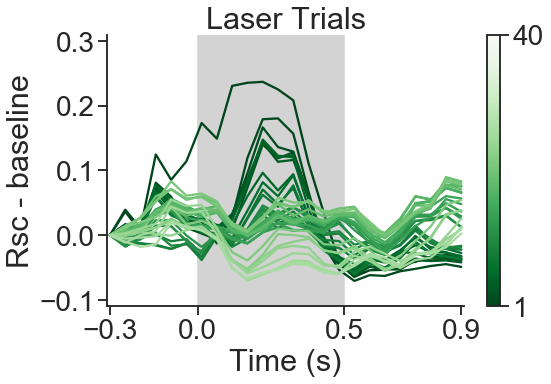

In [611]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":2.3})

n = len(mR_laserPairs_Laser[:,0])
# Which bin should we take as first one?
bin = 0
a = mR_laserPairs_Laser[:,bin].reshape(np.int(NBlockTrials),1)
Laser_corrs_firstbin = np.tile(a, len(mR_laserPairs_Laser[0]))

color = cm.Greens_r(np.linspace(0,.65,n))
X = np.linspace(-0.3,0.9,24)
Z = mR_laserPairs_Laser - Laser_corrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rsc - baseline')

plt.title('Laser Trials')

plt.xticks((-0.3,0,0.5,0.9))
plt.xlim((-.31,0.91))
plt.ylim((-0.11,0.31))
plt.yticks((-0.1,0,0.1,0.2,0.3))

sns.despine()
# norm = mpl.colors.Normalize(vmin=1,vmax=80)
cmap = mpl.cm.ScalarMappable( cmap=mpl.cm.Greens_r)
cmap.set_clim( vmin=1, vmax=40)
cmap.set_array([])

fig.colorbar(cmap,ticks = [1,40])

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
plt.fill_between([0,0.5], y1=ylim[1], y2=[ylim[0],ylim[0]], 
                 color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/deltaCorrLaser_awake.pdf", bbox_inches="tight")


plt.show()

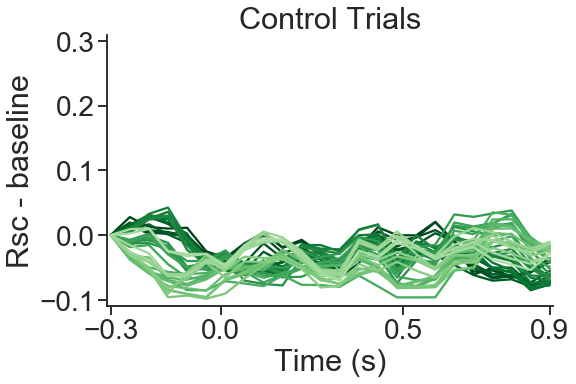

In [819]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":2.3})

n = len(mR_laserPairs_Control[:,0])
# Which bin to take as first one?
bin=0
a = mR_laserPairs_Control[:,bin].reshape(np.int(NBlockTrials),1)
Control_corrs_firstbin = np.tile(a, len(mR_laserPairs_Control[0]))

color = cm.Greens(np.linspace(1,0.35,n))
X = np.linspace(-0.3,0.9,24)
Z = mR_laserPairs_Control - Control_corrs_firstbin

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel('Rsc - baseline')

plt.title('Control Trials')

plt.xticks((-0.3,0,0.5,0.9))
plt.xlim((-.31,0.91))
plt.ylim((-0.11,0.31))
plt.yticks((-0.1,0,0.1,0.2,0.3))

sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=40)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
cmap.set_array([])

# fig.colorbar(cmap)

# fig.savefig("./PlotsForPaperWithAriana/deltaCorrControl_awake.pdf", bbox_inches="tight")


plt.show()

In [613]:
Control_Jei = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
Laser_Jei = np.zeros((np.int(Total_number_trials/2),np.int(TrialTime/dt)))
j=0;k=0;
TrialTime = np.int(TrialTime)
dt=0.1
for i in range(np.int(Total_number_trials)):
    if np.isin(i+1,ControlTrials):
        Control_Jei[j,0:np.int(TrialTime/dt)] = TotalJei[0,i*int(TrialTime/dt):i*int(TrialTime/dt)+np.int(TrialTime/dt)]
        j+=1
    else:
        Laser_Jei[k,0:np.int(TrialTime/dt)] = TotalJei[0,i*int(TrialTime/dt):i*int(TrialTime/dt)+np.int(TrialTime/dt)]
        k+=1


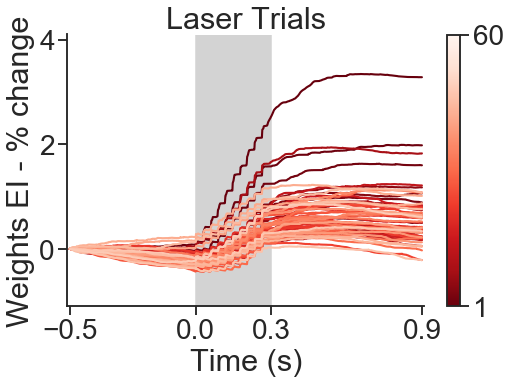

In [891]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":2.1})

# Shade area where laser is ON.
ax.axvspan(0, 0.3, alpha=0.2, color='black')

n = int(Total_number_trials/2)
# Which bin to take as first one?
bin=0
a = Laser_Jei[:,0].reshape(np.int(Total_number_trials/2),1)
Laser_Jei_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Reds(np.linspace(1,.2,n))
X = np.linspace(-0.5,0.9,14000)
Z = (Laser_Jei - Laser_Jei_firstbin) / Laser_Jei_firstbin *100

for i,c in zip(range(n),color):
    plt.plot(X, Z[i,:],c=c)

plt.xlabel('Time (s)')
plt.ylabel(r'Weights EI - % change')

plt.title('Laser Trials')
plt.ylim((-1.1,4.1))
plt.xlim((-0.51,0.91))
plt.xticks((-.5,0,0.3,0.9))
sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=60)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds_r)
cmap.set_array([])

fig.colorbar(cmap,ticks = [1,60])

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())
plt.fill_between([0,0.3], y1=ylim[1], y2=[ylim[0],ylim[0]], 
                 color="lightgray", zorder=0 )

# fig.savefig("./PlotsForPaperWithAriana/Jeichange_laser_awake.pdf", bbox_inches="tight")


plt.show()

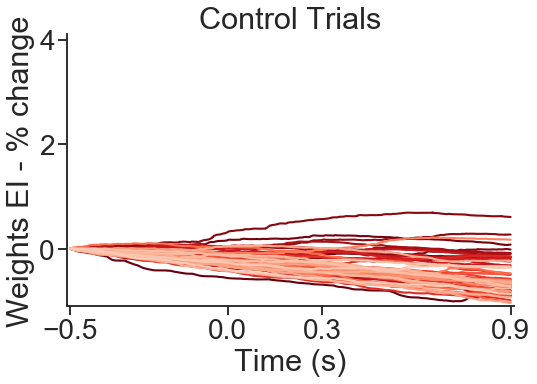

In [892]:
 from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,5))
import matplotlib as mpl
from matplotlib import cm, colorbar 

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":2.1})

n = int(Total_number_trials/2)
# Which bin to take as first one?
bin=0
a = Control_Jei[:,0].reshape(np.int(Total_number_trials/2),1)
Control_Jei_firstbin = np.tile(a, (np.int(TrialTime/dt)))

color = cm.Reds(np.linspace(1,.2,n))
X = np.linspace(-0.5,0.9,14000)
Z = (Control_Jei - Control_Jei_firstbin) / Control_Jei_firstbin *100

for i,c in zip(range(n),color):
    plt.plot(X, (Z[i,:]),c=c)

plt.xlabel('Time (s)')
plt.ylabel('Weights EI - % change')

plt.title('Control Trials')
plt.ylim((-1.1,4.1))
plt.xlim((-0.51,0.91))
plt.xticks((-.5,0,0.3,0.9))
sns.despine()
norm = mpl.colors.Normalize(vmin=1,vmax=60)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
cmap.set_array([])

# fig.colorbar(cmap)

# fig.savefig("./PlotsForPaperWithAriana/Jeichange_control_awake.pdf", bbox_inches="tight")


plt.show()

In [877]:
# set the colormap and centre the colorbar
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0.25, 0.5, 0.75] #[0.3, 0.5, 0.7]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

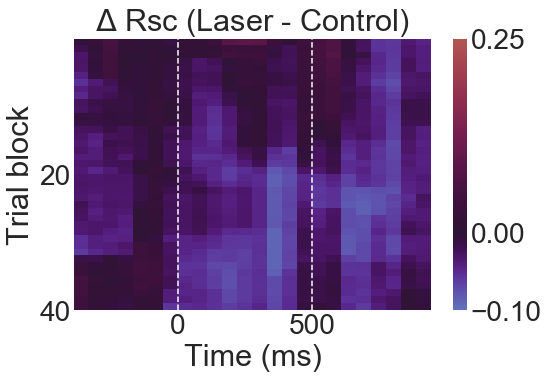

In [912]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})

ax = sns.heatmap(mR_laserPairs_Laser-np.mean(mR_laserPairs_Control, axis=0),cmap='twilight',
                norm=MidpointNormalize(midpoint=0,vmin=-0,vmax=0),
                xticklabels= (0,500),
                yticklabels= (20,40),
                vmin=-0.1,vmax=0.25,
                rasterized=True
                )
plt.xticks((7,16))
plt.yticks((20,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7, color='white',linestyle='--',linewidth=1.5)
plt.axvline(x=16, color='white',linestyle='--',linewidth=1.5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-0.1, 0, 0.25])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
cax = plt.gcf().axes[-1]
cax.tick_params(size=0)

plt.title('$\Delta$ Rsc (Laser - Control)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block')

# fig.savefig("./PlotsForPaperWithAriana/corr_heatmap_awake.pdf", bbox_inches="tight")

# fig.savefig("./PlotsForPaperWithAriana/corr_heatmap_rest.pdf", bbox_inches="tight")

plt.show()

In [622]:
np.min(mR_laserPairs_Laser-np.mean(mR_laserPairs_Control, axis=0))

-0.09888789011430273

In [822]:
# set the colormap and centre the colorbar
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0.42, 0.5, 0.8] #[0.25, 0.5, 0.95]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))



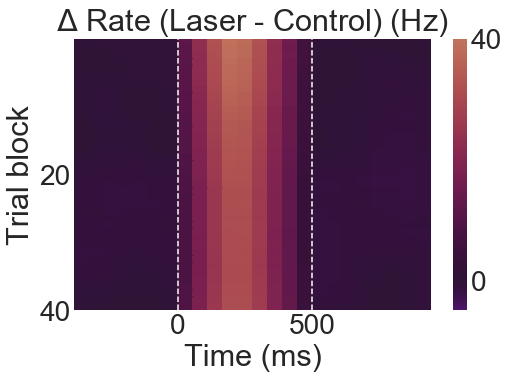

In [823]:
import seaborn as sns

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})
ax = sns.heatmap(1000*FR_laserPairs_Laser-1000*np.mean(FR_laserPairs_Control),cmap='twilight',
                norm=MidpointNormalize(midpoint=0,vmin=-0.1,vmax=0.1),
                xticklabels= (0,500),
                yticklabels= (20,40),
                vmin=-5,vmax=40,
                rasterized=True
                )
plt.xticks((7,16))
plt.yticks((20,40))
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
ax.tick_params(axis='both', which='both', length=0)
plt.axvline(x=7, color='white',linestyle='--',linewidth=1.5)
plt.axvline(x=16, color='white',linestyle='--',linewidth=1.5)

cbar = ax.collections[0].colorbar
cbar.set_ticks([0,40])
# cbar.set_ticklabels(['low', '20%', '75%', '100%'])
cax = plt.gcf().axes[-1]
cax.tick_params(size=0)

plt.title('$\Delta$ Rate (Laser - Control) (Hz)')
plt.xlabel('Time (ms)')
plt.ylabel('Trial block')

# fig.savefig("./PlotsForPaperWithAriana/FR_heatmap_awake.pdf", bbox_inches="tight")

# fig.savefig("./PlotsForPaperWithAriana/FR_heatmap_rest.pdf", bbox_inches="tight")



plt.show()

In [697]:
np.max(1000*FR_laserPairs_Laser-1000*np.mean(FR_laserPairs_Control))

43.15490134016798

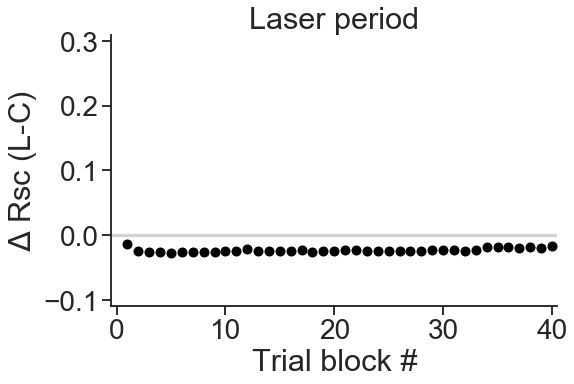

In [756]:
# Do laser pairs only. Laser period

fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.7, rc={"lines.linewidth":3.3})

plt.axhline(y=0, color="lightgray")

bin = 11

plt.errorbar(np.arange(1,NBlockTrials+1,step=1), mR_laserPairs_Laser[:,bin] - np.mean(mR_laserPairs_Control[:,bin]),
             yerr=mR_stderr_laserPairs_Laser[:,bin],LineWidth=3,
             marker='o',linestyle='', color='black',markersize=9)
polynomial = np.polyfit(np.arange(1,NBlockTrials+1,step=1), mR_laserPairs_Laser[:,bin] - np.mean(mR_laserPairs_Control[:,bin]) , 2)
fit = np.polyval(polynomial,np.arange(1,NBlockTrials+1,step=1))
# plt.plot(np.arange(1,NBlockTrials+1,step=1), fit ,LineWidth=3,color='black')

plt.xlabel(r'Trial block #')
plt.ylabel(r'$\Delta$ Rsc (L-C)')

plt.title('Laser period')
# plt.yticks((-0.1,0,0.1,0.2,0.3))
# plt.xticks((2,4,6,8,10),fontsize=30)

plt.xlim(-0.5, 40.5)
plt.ylim(-0.11,0.31)
plt.yticks((-0.1,0,0.1,0.2,0.3))



sns.despine()


# fig.savefig("./PlotsForPaperWithAriana/deltaCorrLaser_block_awake.pdf", bbox_inches="tight")
# fig.savefig("./PlotsForPaperWithAriana/deltaCorrLaser_block_rest.pdf", bbox_inches="tight")

plt.show()




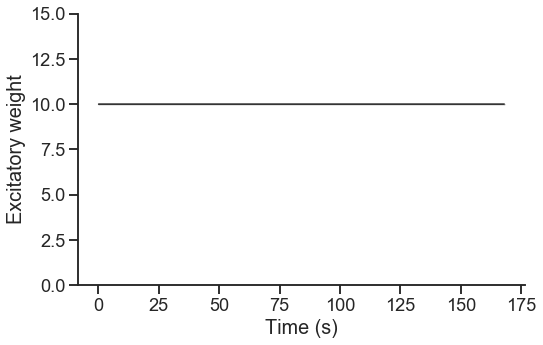

In [53]:
## EE Weights

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":1.3})

plt.plot(timeRecord[::10], TotalJee[0][::10], '-', color='black')

plt.fill_between(timeRecord[::10], TotalJee[0][::10] - Jee_std_err[0][::10], TotalJee[0][::10] + Jee_std_err[0][::10],
                 color='gray', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Excitatory weight')

plt.ylim((0,15))

sns.despine()

plt.show()

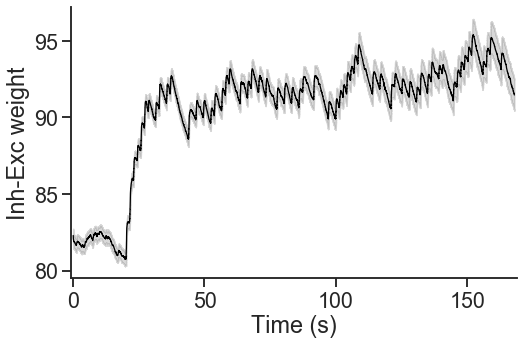

In [45]:
## EI weights

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth":1.3})

plt.plot(timeRecord[::10], TotalJei[0][::10], '-', color='black')

plt.fill_between(timeRecord[::10], TotalJei[0][::10] - Jei_std_err[0][::10], TotalJei[0][::10] + Jei_std_err[0][::10],
                 color='gray', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Inh-Exc weight')

plt.xlim((-1,169))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/weights_rest.pdf", bbox_inches="tight")

plt.show()

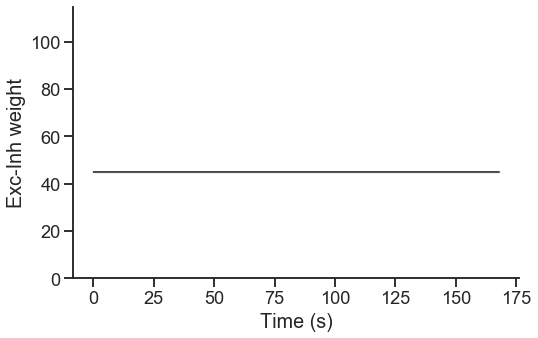

In [54]:
## IE Weights

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":1.3})

plt.plot(timeRecord[::10], TotalJie[0][::10], '-', color='black')

plt.fill_between(timeRecord[::10], TotalJie[0][::10] - Jie_std_err[0][::10], TotalJie[0][::10] + Jie_std_err[0][::10],
                 color='gray', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Exc-Inh weight')

plt.ylim((0,115))



sns.despine()

plt.show()

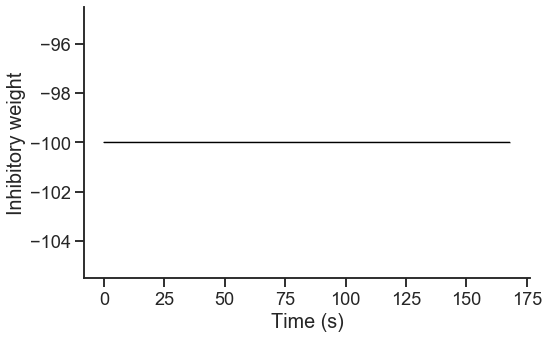

In [51]:
## II Weights

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth":1.3})

plt.plot(timeRecord[::10], TotalJii[0][::10], '-', color='black')

plt.fill_between(timeRecord[::10], TotalJii[0][::10] - Jii_std_err[0][::10], TotalJii[0][::10] + Jii_std_err[0][::10],
                 color='gray', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Inhibitory weight')



sns.despine()

plt.show()

In [101]:
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_9_scale_0.4.mat') # Has currents and psth

mat_contents['IiCurrent_stim']

array([[ 0.        ,  0.        ,  0.        , ..., -1.91439184,
        -1.85892354, -1.95484216]])

In [169]:
# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.mat') # Has currents and psth
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_eeSTDP.mat') # Has currents and psth

# mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_freq_35_allcorrs.mat') # Has currents and psth
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_freq_35_eeSTDP_allcorrs.mat') # Has currents and psth

mR_laserPairs_Control = mat_contents['mR_laserPairs_Control']

All_corrs_laser_early = mat_contents['All_corrs_laser_early'] - np.mean(mR_laserPairs_Control,axis=0)[11]
All_corrs_laser_late = mat_contents['All_corrs_laser_late'] - np.mean(mR_laserPairs_Control,axis=0)[11]
All_corrs_laser_blocks = mat_contents['All_corrs_laser'] - np.mean(mR_laserPairs_Control,axis=0)[11]

All_corrs_control_early = mat_contents['All_corrs_control_early'] 
All_corrs_control_late = mat_contents['All_corrs_control_late'] 
All_corrs_control_blocks = mat_contents['All_corrs_control'] 


In [33]:
mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1.mat') # Has currents and psth
mR_laserPairs_Control = mat_contents['mR_laserPairs_Control']

mat_contents=sio.loadmat('./ArianaVariables_ee_ei_ie_ii_seed_3_scale_1_freq_35_allcorrs.mat') # Has currents and psth

All_corrs_laserminuscontrol_early = mat_contents['All_corrs_laser_early'] - mat_contents['All_corrs_control_early']
All_corrs_laserminuscontrol_late = mat_contents['All_corrs_laser_late'] - mat_contents['All_corrs_control_late']


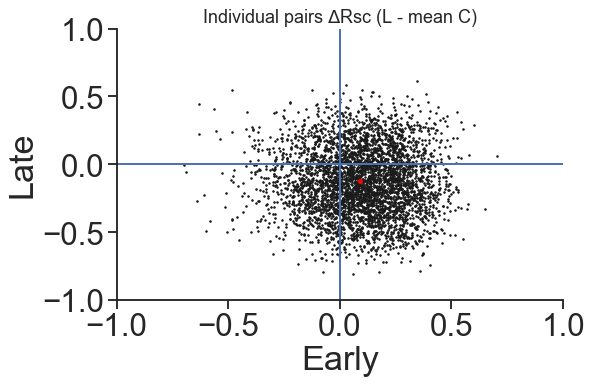

In [170]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.plot(All_corrs_laser_early[0,1:-1],All_corrs_laser_late[0,1:-1],'k.',markersize=3)
plt.plot(np.mean(All_corrs_laser_early[0,1:-1]),
        np.mean(All_corrs_laser_late[0,1:-1]),
        color='red',marker='.',markersize=8)

plt.axhline(y=0,linewidth=2)
plt.axvline(x=0,linewidth=2)
plt.xlabel('Early')
plt.ylabel('Late')
plt.title('Individual pairs $\Delta$Rsc (L - mean C)', fontsize=18)

plt.xlim((-1,1))
plt.ylim((-1,1))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs.pdf", bbox_inches="tight")

plt.show()

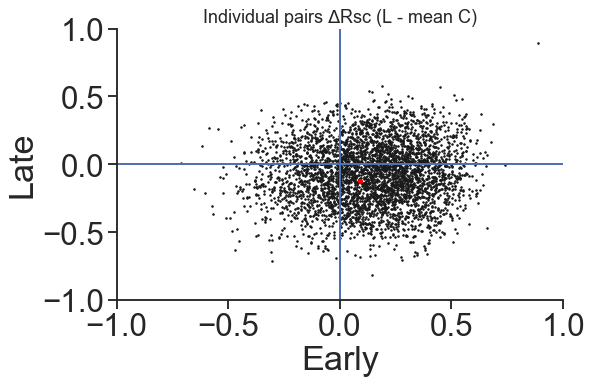

In [171]:
# Start the figure. Use sampled distribution. THIS IS THE ONE.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

mean_early = np.mean(All_corrs_laser_blocks[0:5,:],axis=0)
mean_late = np.mean(All_corrs_laser_blocks[35:40,:],axis=0)
plt.plot(mean_early,mean_late,'k.',markersize=3)
plt.plot(np.mean(All_corrs_laser_early[0,1:-1]),
        np.mean(All_corrs_laser_late[0,1:-1]),
        color='red',marker='.',markersize=8)

plt.axhline(y=0,linewidth=2)
plt.axvline(x=0,linewidth=2)
plt.xlabel('Early')
plt.ylabel('Late')
plt.title('Individual pairs $\Delta$Rsc (L - mean C)', fontsize=18)

plt.xlim((-1,1))
plt.ylim((-1,1))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs.pdf", bbox_inches="tight")

plt.show()

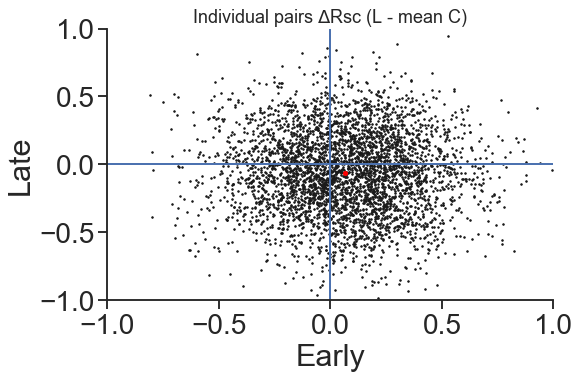

In [34]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.plot(All_corrs_laserminuscontrol_early[0,1:-1],All_corrs_laserminuscontrol_late[0,1:-1],'k.',markersize=3)
plt.plot(np.mean(All_corrs_laserminuscontrol_early[0,1:-1]),
        np.mean(All_corrs_laserminuscontrol_late[0,1:-1]),
        color='red',marker='.',markersize=8)

plt.axhline(y=0,linewidth=2)
plt.axvline(x=0,linewidth=2)
plt.xlabel('Early')
plt.ylabel('Late')
plt.title('Individual pairs $\Delta$Rsc (L - mean C)', fontsize=18)

plt.xlim((-1,1))
plt.ylim((-1,1))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs.pdf", bbox_inches="tight")

plt.show()

In [177]:
# This divides the scatter plot into Q1&2 vs Q3&4.THIS
count_1 = 0; count_2 = 0; count_3 = 0; count_4 = 0;
mean_laser_q1 = 0; mean_laser_q2 = 0; mean_laser_q3 = 0; mean_laser_q4 = 0;
mean_control_q1 = 0; mean_q2 = 0; mean_q3 = 0; mean_q4 = 0;
std_q1 = 0; std_q2 = 0; std_q3 = 0; std_q4 = 0;
std_q1 = 0; mean_q2 = 0; mean_q3 = 0; mean_q4 = 0;
indxs_topQ = []
indxs_bottomQ = []
for i in range(3999):
    if mean_early[i+1] > 0 and mean_late[i+1] > 0:
        count_1 += 1
        indxs_topQ.append(i+1)
    if mean_early[i+1] < 0 and mean_late[i+1] > 0:
        count_2 += 1
        indxs_topQ.append(i+1)
    if mean_early[i+1] < 0 and mean_late[i+1] < 0:
        count_3 += 1
        indxs_bottomQ.append(i+1)
    if mean_early[i+1] > 0 and mean_late[i+1] < 0:
        count_4 += 1
        indxs_bottomQ.append(i+1)
count_1 = count_1 / 3999
count_2 = count_2 / 3999
count_3 = count_3 / 3999
count_4 = count_4 / 3999

In [172]:
# This divides the scatter plot into above and below y=x line.THIS
count_1 = 0; count_2 = 0; count_3 = 0; count_4 = 0;
mean_laser_q1 = 0; mean_laser_q2 = 0; mean_laser_q3 = 0; mean_laser_q4 = 0;
mean_control_q1 = 0; mean_q2 = 0; mean_q3 = 0; mean_q4 = 0;
std_q1 = 0; std_q2 = 0; std_q3 = 0; std_q4 = 0;
std_q1 = 0; mean_q2 = 0; mean_q3 = 0; mean_q4 = 0;
indxs_topQ = []
indxs_bottomQ = []
for i in range(3999):
    if mean_early[i+1] > mean_late[i+1]:
        count_1 += 1
        indxs_bottomQ.append(i+1)
    if mean_early[i+1] < mean_late[i+1]:
        count_4 += 1
        indxs_topQ.append(i+1)
count_1 = count_1 / 3999
count_2 = count_2 / 3999
count_3 = count_3 / 3999
count_4 = count_4 / 3999

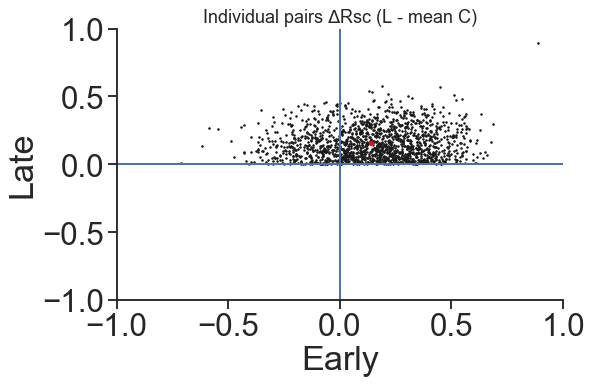

In [178]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.plot(mean_early[indxs_topQ],mean_late[indxs_topQ],'k.',markersize=3)
plt.plot(np.mean(mean_early[indxs_topQ]),
        np.mean(mean_late[indxs_topQ]),
        color='red',marker='.',markersize=8)

plt.axhline(y=0,linewidth=2)
plt.axvline(x=0,linewidth=2)
plt.xlabel('Early')
plt.ylabel('Late')
plt.title('Individual pairs $\Delta$Rsc (L - mean C)', fontsize=18)

plt.xlim((-1,1))
plt.ylim((-1,1))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs.pdf", bbox_inches="tight")

plt.show()

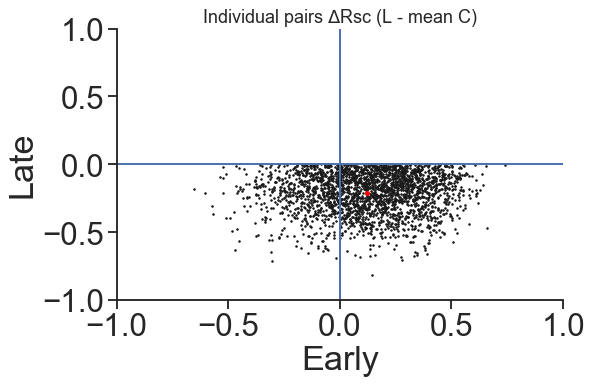

In [179]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.plot(mean_early[indxs_bottomQ],mean_late[indxs_bottomQ],'k.',markersize=3)
plt.plot(np.mean(mean_early[indxs_bottomQ]),
        np.mean(mean_late[indxs_bottomQ]),
        color='red',marker='.',markersize=8)

plt.axhline(y=0,linewidth=2)
plt.axvline(x=0,linewidth=2)
plt.xlabel('Early')
plt.ylabel('Late')
plt.title('Individual pairs $\Delta$Rsc (L - mean C)', fontsize=18)

plt.xlim((-1,1))
plt.ylim((-1,1))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs.pdf", bbox_inches="tight")

plt.show()

In [40]:
# This divides the scatter plot into Q1&2 vs Q3&4.
# count_1 = 0; count_2 = 0; count_3 = 0; count_4 = 0;
# mean_laser_q1 = 0; mean_laser_q2 = 0; mean_laser_q3 = 0; mean_laser_q4 = 0;
# mean_control_q1 = 0; mean_q2 = 0; mean_q3 = 0; mean_q4 = 0;
# std_q1 = 0; std_q2 = 0; std_q3 = 0; std_q4 = 0;
# std_q1 = 0; mean_q2 = 0; mean_q3 = 0; mean_q4 = 0;
# Mean_top_corrs = np.zeros((40,1))
# Mean_bottom_corrs = np.zeros((40,1))
# for j in range(40): # Number of blocks.
#     indxs_topQ = []
#     indxs_bottomQ = []
#     for i in range(3999):
#         if All_corrs_laser_blocks[j,i+1] > 0 and All_corrs_laser_blocks[j,i+1] > 0:
#             count_1 += 1
#             indxs_topQ.append(i+1)
#         if All_corrs_laser_blocks[j,i+1] < 0 and All_corrs_laser_blocks[j,i+1] > 0:
#             count_2 += 1
#             indxs_topQ.append(i+1)
#         if All_corrs_laser_blocks[j,i+1] < 0 and All_corrs_laser_blocks[j,i+1] < 0:
#             count_3 += 1
#             indxs_bottomQ.append(i+1)
#         if All_corrs_laser_blocks[j,i+1] > 0 and All_corrs_laser_blocks[j,i+1] < 0:
#             count_4 += 1
#             indxs_bottomQ.append(i+1)
#     Mean_top_corrs[j] = np.mean(All_corrs_laser_blocks[j,indxs_topQ],axis=0)
#     Mean_bottom_corrs[j] = np.mean(All_corrs_laser_blocks[j,indxs_bottomQ],axis=0)


# count_1 = count_1 / 3999
# count_2 = count_2 / 3999
# count_3 = count_3 / 3999
# count_4 = count_4 / 3999

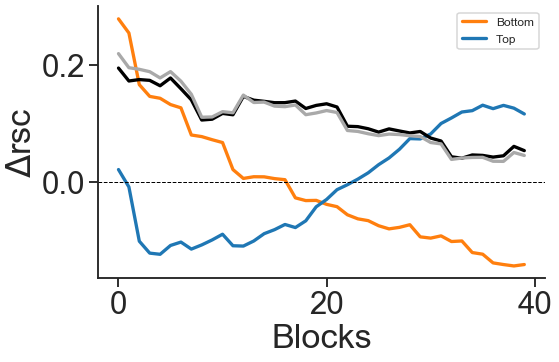

In [129]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.plot(np.mean(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1),'tab:orange',
        label='Bottom')
plt.plot(np.mean(All_corrs_laser_blocks[:,indxs_topQ],axis=1),'tab:blue',
        label='Top')

plt.plot(np.mean(All_corrs_control_blocks[:,indxs_topQ],axis=1),'black')

# plt.plot(0.5*np.mean(All_corrs_laser_blocks[:,indxs_topQ],axis=1)
#          +0.5*np.mean(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1),'tab:red')

plt.plot(np.mean(All_corrs_control_blocks[:,indxs_bottomQ],axis=1),'darkgray')
# plt.plot(np.mean(All_corrs_laser_early[0,indxs_bottomQ]),
#         np.mean(All_corrs_laser_late[0,indxs_bottomQ]),
#         color='red',marker='.',markersize=8)

plt.axhline(y=0,linewidth=1,color='black',linestyle='--')
plt.xlabel('Blocks')
plt.ylabel('$\Delta$rsc')

plt.legend(fontsize=12)

# plt.xlim((-1,1))
# plt.ylim((-1,1))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs.pdf", bbox_inches="tight")

plt.show()

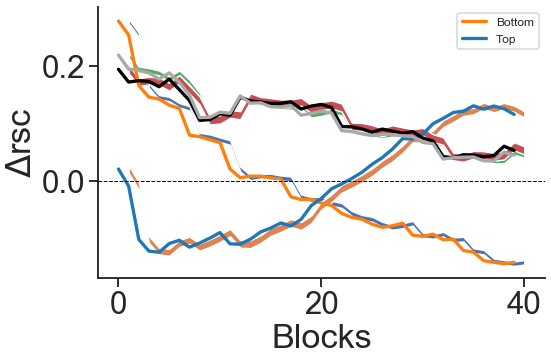

In [134]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

x = np.arange(1,41,step=1)

plt.plot(np.mean(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1),'tab:orange',
        label='Bottom')
plt.plot(np.mean(All_corrs_laser_blocks[:,indxs_topQ],axis=1),'tab:blue',
        label='Top')
plt.plot(np.mean(All_corrs_control_blocks[:,indxs_topQ],axis=1),'black')

plt.plot(np.mean(All_corrs_control_blocks[:,indxs_bottomQ],axis=1),'darkgray')


error_laser_bottom = np.std(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1)/np.sqrt(len(indxs_bottomQ))
plt.fill_between(x, np.mean(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1)-error_laser_bottom
                            , np.mean(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1)+error_laser_bottom)

error_laser_top = np.std(All_corrs_laser_blocks[:,indxs_topQ],axis=1)/np.sqrt(len(indxs_topQ))
plt.fill_between(x, np.mean(All_corrs_laser_blocks[:,indxs_topQ],axis=1)-error_laser_top
                 ,np.mean(All_corrs_laser_blocks[:,indxs_topQ],axis=1)+error_laser_top)

error_control_bottom = np.std(All_corrs_control_blocks[:,indxs_bottomQ],axis=1)/np.sqrt(len(indxs_bottomQ))
plt.fill_between(x, np.mean(All_corrs_control_blocks[:,indxs_bottomQ],axis=1)-error_control_bottom, 
                 np.mean(All_corrs_control_blocks[:,indxs_bottomQ],axis=1)+error_control_bottom)

error_control_top = np.std(All_corrs_control_blocks[:,indxs_topQ],axis=1)/np.sqrt(len(indxs_topQ))
plt.fill_between(x, np.mean(All_corrs_control_blocks[:,indxs_topQ],axis=1)-error_control_top
                 ,np.mean(All_corrs_control_blocks[:,indxs_topQ],axis=1)+error_control_top)


plt.axhline(y=0,linewidth=1,color='black',linestyle='--')
plt.xlabel('Blocks')
plt.ylabel('$\Delta$rsc')

plt.legend(fontsize=12)

# plt.xlim((-1,1))
# plt.ylim((-1,1))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs.pdf", bbox_inches="tight")

plt.show()

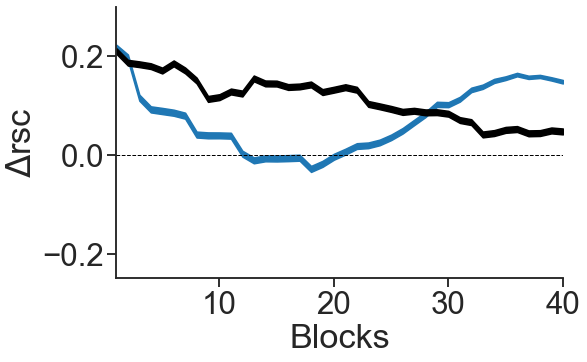

In [180]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

x = np.arange(1,41,step=1)

# plt.plot(x,np.mean(All_corrs_laser_blocks[:,indxs_topQ],axis=1),'tab:blue',
#         label='Top')
# plt.plot(x,np.mean(All_corrs_control_blocks[:,indxs_topQ],axis=1),'black')


error_laser_top = np.std(All_corrs_laser_blocks[:,indxs_topQ],axis=1)/np.sqrt(len(indxs_topQ))
plt.fill_between(x, np.mean(All_corrs_laser_blocks[:,indxs_topQ],axis=1)-error_laser_top
                 ,np.mean(All_corrs_laser_blocks[:,indxs_topQ],axis=1)+error_laser_top,
                color='tab:blue')

error_control_top = np.std(All_corrs_control_blocks[:,indxs_topQ],axis=1)/np.sqrt(len(indxs_topQ))
plt.fill_between(x, np.mean(All_corrs_control_blocks[:,indxs_topQ],axis=1)-error_control_top
                 ,np.mean(All_corrs_control_blocks[:,indxs_topQ],axis=1)+error_control_top,
                color='black')


plt.axhline(y=0,linewidth=1,color='black',linestyle='--')
plt.xlabel('Blocks')
plt.ylabel('$\Delta$rsc')

# plt.legend(fontsize=12)

plt.xlim((1,40))
plt.ylim((-0.25,0.3))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs.pdf", bbox_inches="tight")

plt.show()

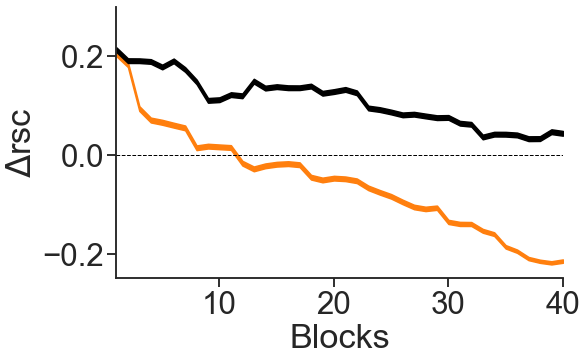

In [181]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

x = np.arange(1,41,step=1)

# plt.plot(x,np.mean(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1),'tab:orange',
#         label='Bottom')
# plt.plot(x,np.mean(All_corrs_control_blocks[:,indxs_bottomQ],axis=1),'black')


error_laser_bottom = np.std(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1)/np.sqrt(len(indxs_bottomQ))
plt.fill_between(x, np.mean(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1)-error_laser_bottom
                            , np.mean(All_corrs_laser_blocks[:,indxs_bottomQ],axis=1)+error_laser_bottom,
                color='tab:orange')

error_control_bottom = np.std(All_corrs_control_blocks[:,indxs_bottomQ],axis=1)/np.sqrt(len(indxs_bottomQ))
plt.fill_between(x, np.mean(All_corrs_control_blocks[:,indxs_bottomQ],axis=1)-error_control_bottom, 
                 np.mean(All_corrs_control_blocks[:,indxs_bottomQ],axis=1)+error_control_bottom,
                color='black')


plt.axhline(y=0,linewidth=1,color='black',linestyle='--')
plt.xlabel('Blocks')
plt.ylabel('$\Delta$rsc')

# plt.legend(fontsize=12)

plt.xlim((1,40))
plt.ylim((-0.25,0.3))

sns.despine()

# fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs.pdf", bbox_inches="tight")

plt.show()

In [31]:
np.mean(mR_laserPairs_Control,axis=0)[11].shape

()

In [36]:
# Laser minus control each
count_1 = 0; count_2 = 0; count_3 = 0; count_4 = 0;
mean_laser_q1 = 0; mean_laser_q2 = 0; mean_laser_q3 = 0; mean_laser_q4 = 0;
mean_control_q1 = 0; mean_q2 = 0; mean_q3 = 0; mean_q4 = 0;
std_q1 = 0; std_q2 = 0; std_q3 = 0; std_q4 = 0;
std_q1 = 0; mean_q2 = 0; mean_q3 = 0; mean_q4 = 0;
for i in range(3999):
    if All_corrs_laserminuscontrol_early[0,i+1] > 0 and All_corrs_laserminuscontrol_late[0,i+1] > 0:
        count_1 += 1
    if All_corrs_laserminuscontrol_early[0,i+1] < 0 and All_corrs_laserminuscontrol_late[0,i+1] > 0:
        count_2 += 1
    if All_corrs_laserminuscontrol_early[0,i+1] < 0 and All_corrs_laserminuscontrol_late[0,i+1] < 0:
        count_3 += 1
    if All_corrs_laserminuscontrol_early[0,i+1] > 0 and All_corrs_laserminuscontrol_late[0,i+1] < 0:
        count_4 += 1
count_1 = count_1 / 3999
count_2 = count_2 / 3999
count_3 = count_3 / 3999
count_4 = count_4 / 3999

In [125]:
print(count_1,count_2,count_3,count_4)
count_1+count_2+count_3+count_4

0.28557139284821204 0.10902725681420355 0.17229307326831708 0.4331082770692673


1.0

0.06882103376858545
-0.10596146087979014


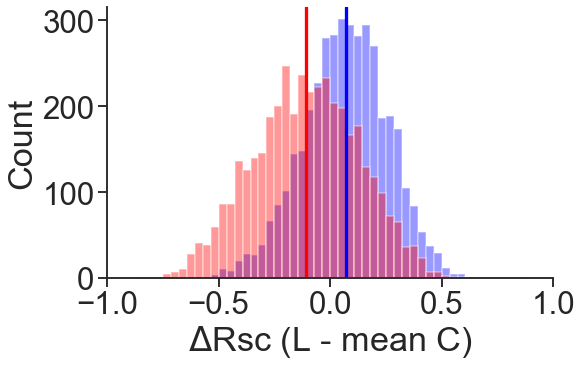

In [131]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

bins=np.histogram(np.hstack((All_corrs_laser_early[0,:],All_corrs_laser_late[0,:])), bins=50)[1] #get the bin edges

sns.distplot(All_corrs_laser_early[0,:],color='blue',kde = False,bins=bins)
sns.distplot(All_corrs_laser_late[0,:],color='red',kde = False,bins=bins)

plt.axvline(np.mean(All_corrs_laser_early[0,:]),color='blue')
plt.axvline(np.mean(All_corrs_laser_late[0,:]),color='red')

print(np.mean(All_corrs_laser_early[0,:]))
print(np.mean(All_corrs_laser_late[0,:]))

plt.xlabel(r'$\Delta$Rsc (L - mean C)')
plt.ylabel('Count')

plt.xlim((-1,1))

sns.despine()

fig.savefig("./PlotsForPaperWithAriana/Supp_Figs/corrs_allpairs_distribution.pdf", bbox_inches="tight")

plt.show()

0.12462155812294232
-0.07082501754453484


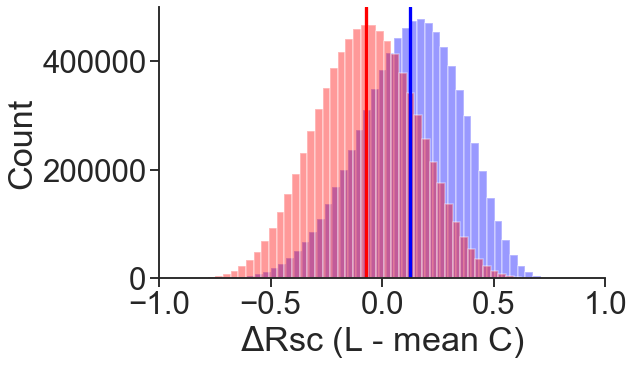

In [82]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

sns.distplot(All_corrs_laser_early[np.triu(All_corrs_laser_early, k = 1)!=0],color='blue',kde = False)
sns.distplot(All_corrs_laser_late[np.triu(All_corrs_laser_late, k = 1)!=0],color='red',kde = False)

plt.axvline(np.mean(All_corrs_laser_early[np.triu(All_corrs_laser_early, k = 1)!=0]),color='blue')
plt.axvline(np.mean(All_corrs_laser_late[np.triu(All_corrs_laser_late, k = 1)!=0]),color='red')

print(np.mean(All_corrs_laser_early[np.triu(All_corrs_laser_early, k = 1)!=0]))
print(np.mean(All_corrs_laser_late[np.triu(All_corrs_laser_late, k = 1)!=0]))

plt.xlabel(r'$\Delta$Rsc (L - mean C)')
plt.ylabel('Count')

plt.xlim((-1,1))

sns.despine()

plt.show()

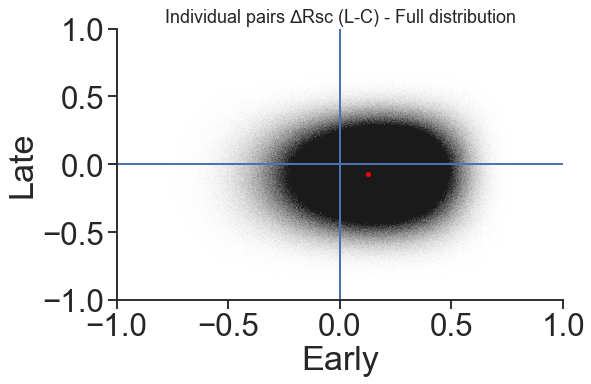

In [87]:
# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

plt.plot(All_corrs_laser_early[np.triu(All_corrs_laser_early, k = 1)!=0],
         All_corrs_laser_late[np.triu(All_corrs_laser_late, k = 1)!=0],'k.',markersize=0.005)
plt.plot(np.mean(All_corrs_laser_early[np.triu(All_corrs_laser_early, k = 1)!=0]),
        np.mean(All_corrs_laser_late[np.triu(All_corrs_laser_late, k = 1)!=0]),
        color='red',marker='.',markersize=8)
plt.axhline(y=0,linewidth=2)
plt.axvline(x=0,linewidth=2)
plt.xlabel('Early')
plt.ylabel('Late')
plt.title('Individual pairs $\Delta$Rsc (L-C) - Full distribution',fontsize=18)

plt.xlim((-1,1))
plt.ylim((-1,1))

sns.despine()

plt.show()